In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# df=pd.read_csv("data_season.csv")
# df.head(5)

The missing values in the 'Soil type' column will be difficult to impute. Especially since the precise locations of the farms are unknown. Since only a small percentage of observations contain missing values, it may be best to drop those observations.

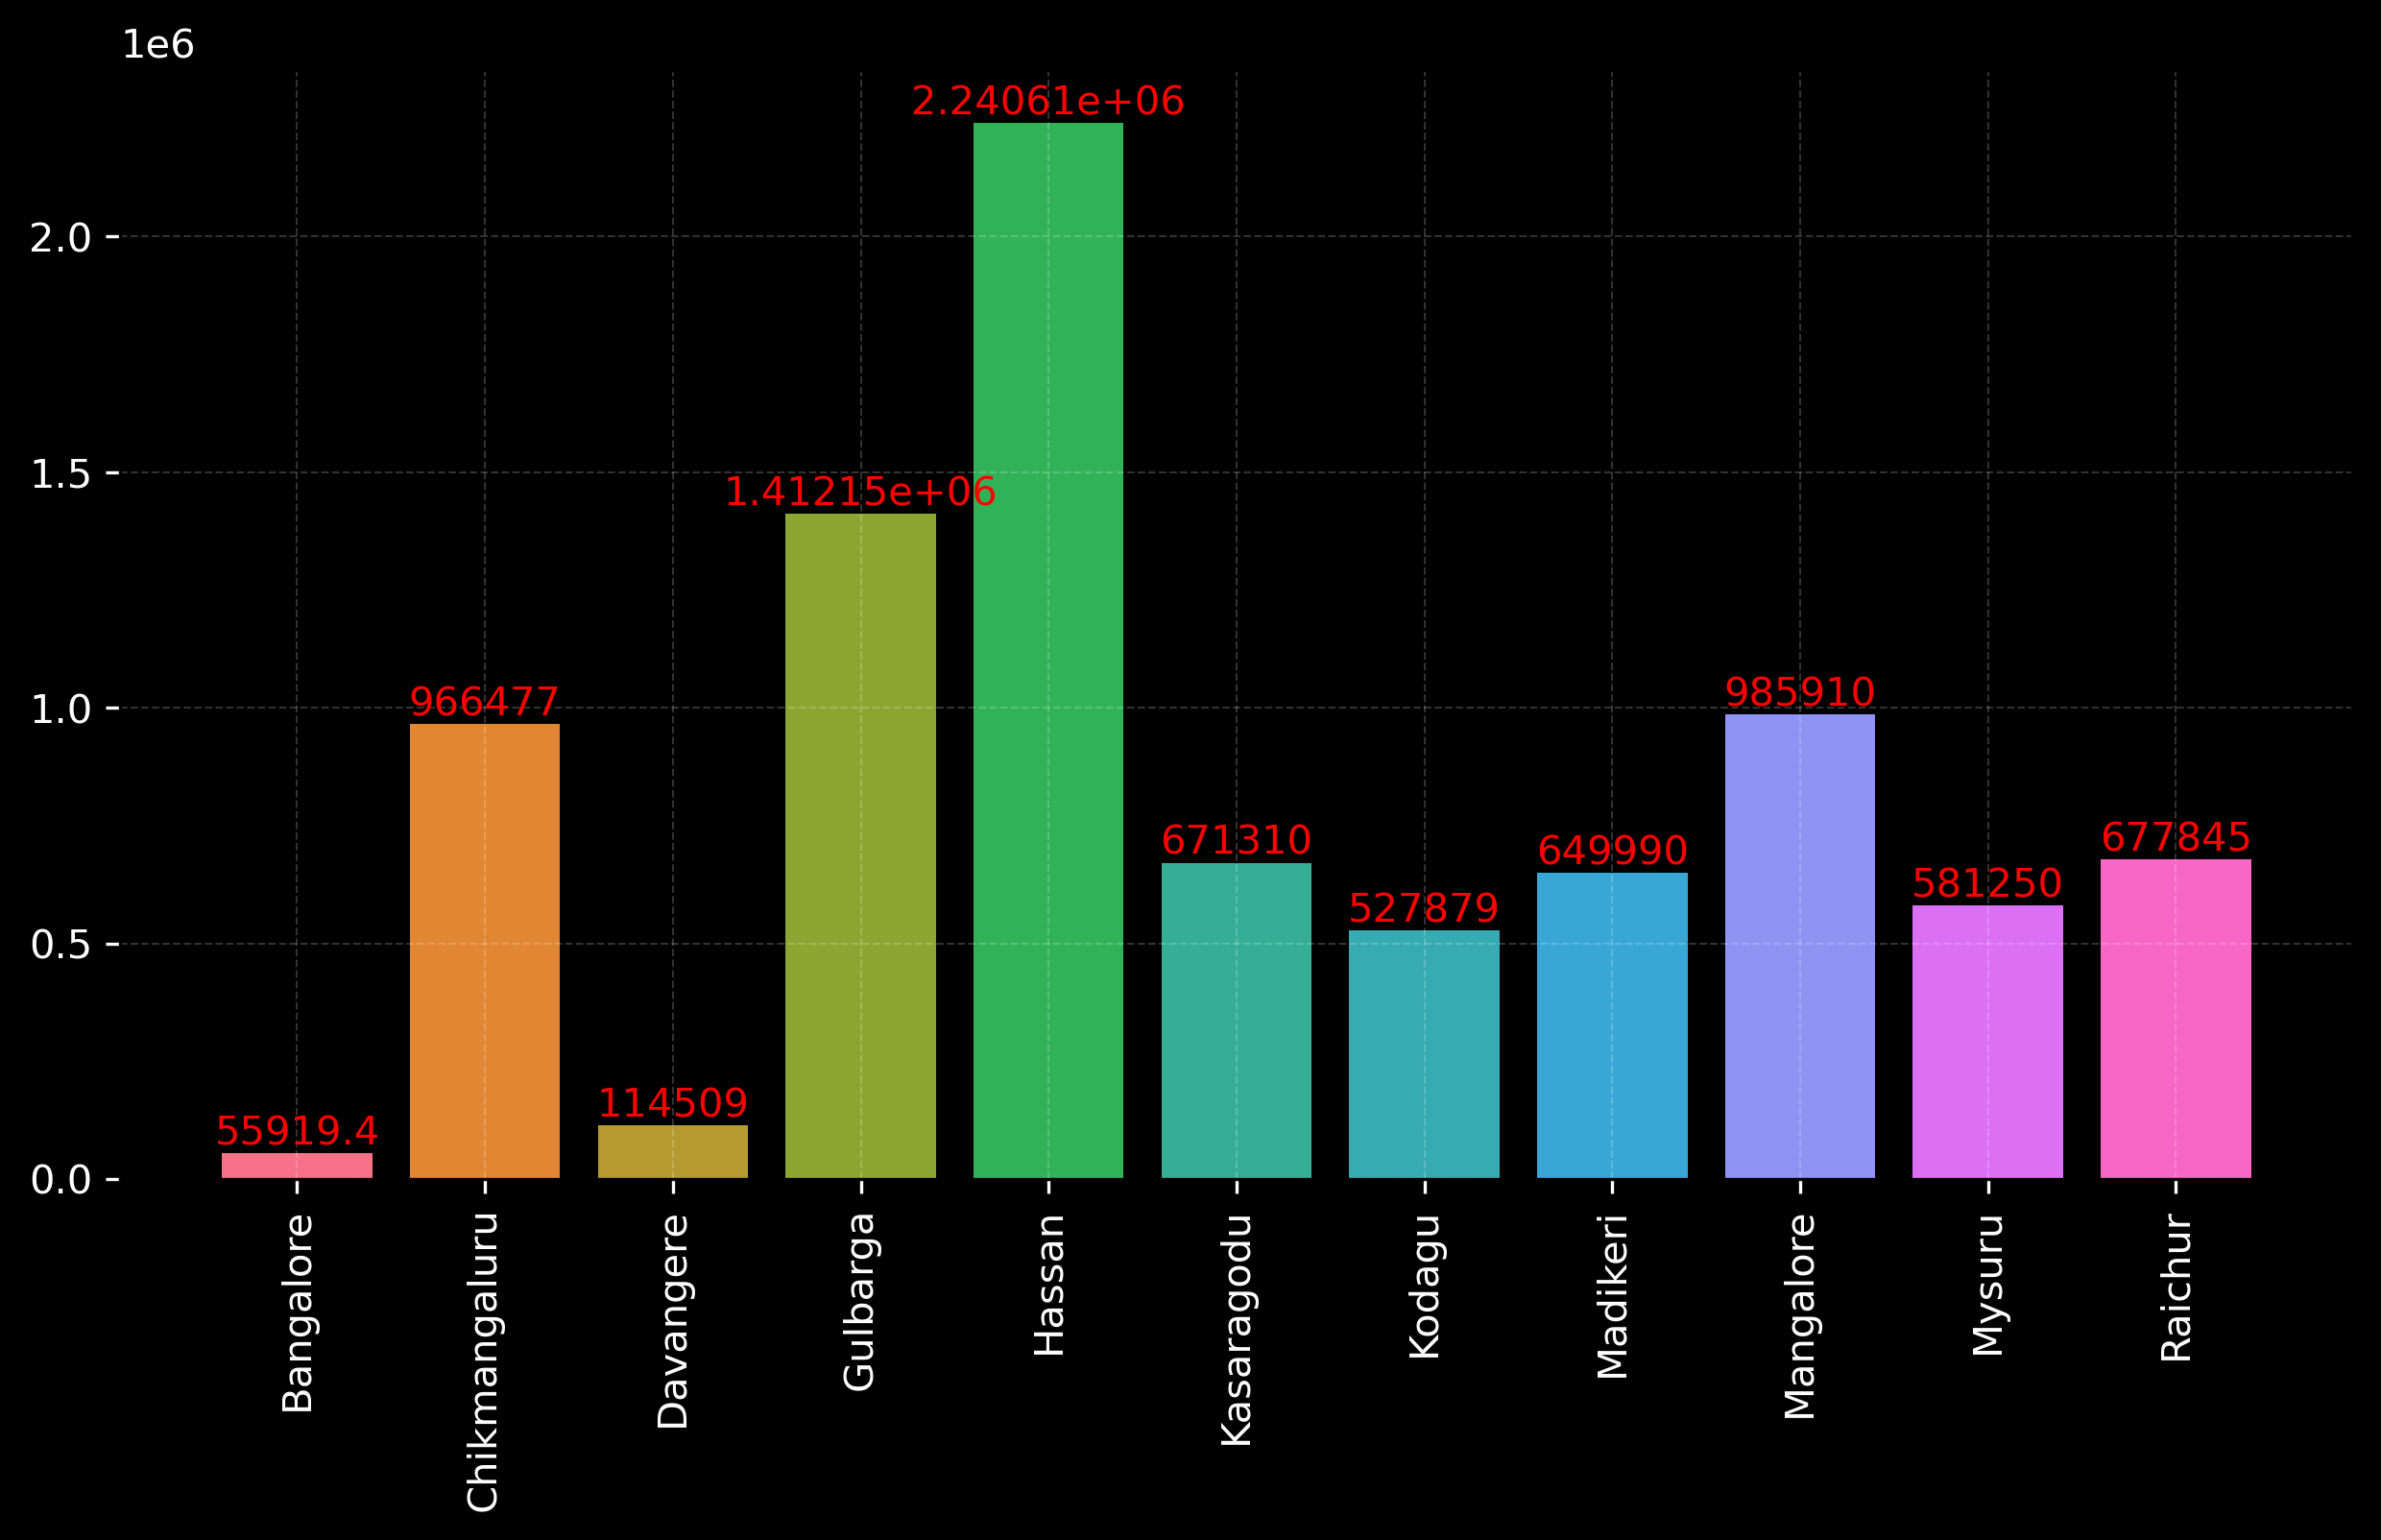

In [2]:
df_Chart = df.groupby("Location")["Rainfall"].sum().reset_index()  # محاسبه مجموع بارش برای هر Location

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
colors = sns.color_palette("husl", len(df_Chart))  # پالت رنگی متنوع

ax.bar(df_Chart["Location"], df_Chart["Rainfall"], color=colors)  # نمایش مجموع بارش هر مکان
ax.tick_params(axis="x", rotation=90)

# تغییر رنگ پس‌زمینه
fig.patch.set_color("black")
ax.patch.set_color("black")

# تغییر رنگ محورها
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.bar_label(ax.containers[0],color="red")
# اضافه کردن شبکه
ax.grid(True, linestyle="--", color="white", linewidth=0.5, alpha=0.2)

plt.show()


In [3]:
df.isna().sum()

Year            0
Location        0
Area            0
Rainfall        0
Temperature     0
Soil type      58
Irrigation      0
yeild          0
Humidity        0
Crops           0
price           0
Season          0
dtype: int64

<Axes: ylabel='Rainfall'>

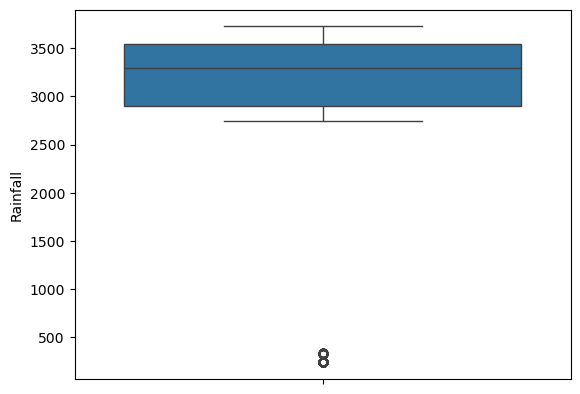

In [4]:
sns.boxplot(data=df["Rainfall"])

In [5]:
df["Rainfall"].min()
df["Rainfall"].max()
df["Rainfall"].min()

233.0

In [6]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeild', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [7]:
# x=df.sort_values(by="Rainfall")
# plt.scatter(x["Rainfall"],x["Irrigation"])
df["Irrigation"]

0       Drip
1       Drip
2       Drip
3       Drip
4       Drip
        ... 
3153    Drip
3154    Drip
3155    Drip
3156    Drip
3157    Drip
Name: Irrigation, Length: 3158, dtype: object

In [8]:
df["Rainfall"].value_counts()

Rainfall
2903.1    306
2996.6    306
3522.8    288
3729.8    208
3360.0    207
2746.2    206
3605.4    199
3654.0    196
3550.0    192
233.0     189
3512.4    183
3296.0    180
3105.0    178
234.0     171
236.0     107
321.0       7
323.0       7
324.0       7
326.0       7
327.0       7
328.0       7
Name: count, dtype: int64

<Axes: xlabel='Rainfall', ylabel='yeild'>

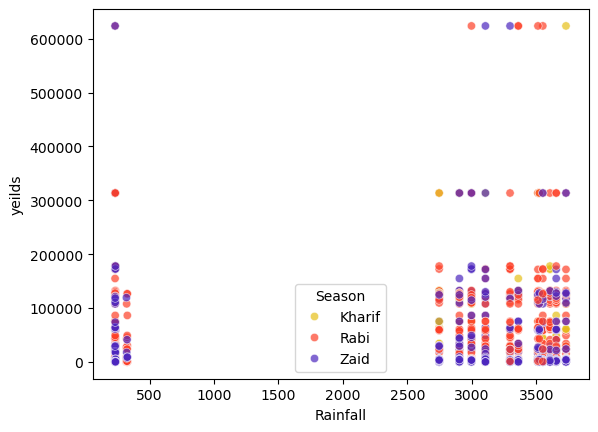

In [9]:
sns.scatterplot(x='Rainfall', y='yeild', data=df, hue='Season', palette='CMRmap_r', alpha=0.7)

In [10]:
df["yeild"].max(),df["yeild"].idxmax()


(623687.0, 83)

In [11]:
df["yeild"].dtype

dtype('float64')

In [12]:
df.iloc[2618]

Year                 2004
Location       Kasaragodu
Area                   56
Rainfall           3512.4
Temperature          39.0
Soil type      Sandy loam
Irrigation          Basin
yeild           130132.0
Humidity             57.0
Crops             Coconut
price                1516
Season               Rabi
Name: 2618, dtype: object

In [13]:
df.loc[83,"yeild"]=623687

In [14]:
df["yeild"].max()

623687.0

NameError: name 'x' is not defined

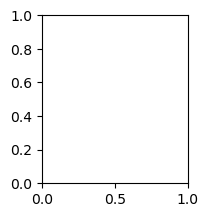

In [15]:
plt.subplot(2, 3, 1)
sns.histplot(x, kde=True, color= 'yellow' )
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year (in)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Location', 'Soil type', 'Irrigation', 'Crops', 'Season'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x239d4089310>,
 'caps': [<matplotlib.lines.Line2D at 0x239d384a1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239d4088da0>],
 'medians': [<matplotlib.lines.Line2D at 0x239d0155970>],
 'fliers': [<matplotlib.lines.Line2D at 0x239d00bf500>],
 'means': []}

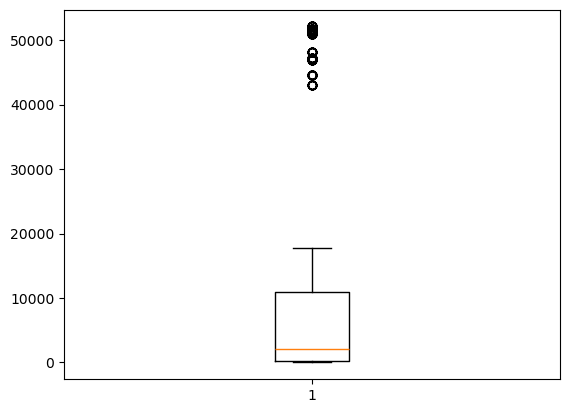

In [ ]:
plt.boxplot(df["Area"])

In [ ]:
df[df["Area"]>=40000]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
5,2004,Mangalore,51179,2996.6,27.0,Alluvial,Drip,107809.0,54.0,Coconut,44235,Kharif
8,2004,Mangalore,50975,3522.8,27.2,Alluvial,Drip,126487.0,59.0,Coconut,45186,Kharif
11,2004,Mangalore,51390,3729.8,27.0,Alluvial,Drip,124492.0,53.0,Coconut,57259,Kharif
14,2004,Kodagu,51709,2746.2,27.0,Alluvial,Drip,132551.0,57.0,Coconut,64409,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2004,Davangere,51040,3360.0,222.0,NaN,Drip,393.0,58.0,Cashew,43311,Zaid
3147,2007,Davangere,48083,3605.4,27.0,NaN,Drip,52.0,50.0,Cashew,45608,Zaid
3150,2010,Davangere,47200,3512.4,27.2,NaN,Drip,114744.0,59.5,Coconut,43562,Rabi
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi


In [ ]:
df[df["Temperature"]>=45]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
131,2013,Gulbarga,206,321.0,128.0,Red,Drip,67.0,53.0,Cocoa,45186,Zaid
132,2014,Gulbarga,243,3654.0,129.0,Red,Drip,62.0,52.0,Cocoa,238542,Zaid
133,2015,Gulbarga,123,323.0,130.0,Red,Drip,32.0,51.0,Cocoa,1516,Zaid
134,2016,Gulbarga,82,324.0,131.0,Red,Drip,22.0,57.0,Cocoa,57259,Zaid
135,2017,Gulbarga,74,3105.0,132.0,Red,Drip,25.0,57.0,Cocoa,234779,Zaid
...,...,...,...,...,...,...,...,...,...,...,...,...
3140,2015,Davangere,10912,2746.2,218.0,NaN,Drip,4904.0,57.0,Cashew,1493,Zaid
3141,2016,Davangere,51353,2746.2,219.0,NaN,Drip,2821.0,55.0,Cashew,64409,Zaid
3142,2017,Davangere,142,2746.2,220.0,NaN,Drip,3472.0,56.0,Cashew,249978,Zaid
3143,2018,Davangere,10505,3360.0,221.0,NaN,Drip,3647.0,54.0,Cashew,637,Zaid


In [1]:

plt.scatter(df["Temperature"], df["yeild"], color="blue", alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("yeild")

NameError: name 'plt' is not defined

In [ ]:
import pandas as pd

df_m=df.copy()
indices_to_drop = df_m[df_m["Temperature"] >= 50].index

# حذف سطرهایی با دمای 50 یا بیشتر
df_m.drop(indices_to_drop, inplace=True)

# ریست کردن ایندکس بعد از حذف سطرها
df_m.reset_index(drop=True, inplace=True)

# نمایش تعداد سطر و ستون بعد از حذف داده‌ها
print("اندازه دیتافریم پس از حذف:",  df_m.shape)


اندازه دیتافریم پس از حذف: (2391, 12)


,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
83,2004,Gulbarga,14464,3105.0,42.0,Black,Basin,623687.0,58.5,Coconut,761,Zaid
401,2009,Mysuru,43013,3729.8,42.0,Clay,Basin,623687.0,58.5,Cotton,761,Kharif
717,2013,Hassan,160,3550.0,27.0,River basins,Basin,623687.0,56.6,Coconut,43311,Rabi
1033,2018,Chikmangaluru,4803,3360.0,40.0,Red,Basin,623687.0,54.0,Coconut,249978,Rabi
1349,2014,Hassan,111,2996.6,27.1,Red,Basin,623687.0,57.0,Coconut,1493,Rabi
1665,2004,Chikmangaluru,2688,3296.0,27.1,Dry sandy,Basin,623687.0,57.0,Coconut,57259,Zaid
1981,2011,Raichur,1998,233.0,199.0,Well drained,Basin,623687.0,51.0,Coconut,238542,Rabi
2297,2015,Gulbarga,5864,3512.4,202.0,Black,Basin,623687.0,53.0,Coconut,2134,Rabi
2613,2014,Kasaragodu,29,3360.0,37.0,Sandy loam,Basin,623687.0,50.0,Coconut,44235,Rabi
2929,2016,Mangalore,4,233.0,27.0,Sandy,Basin,623687.0,58.0,Coconut,216396,Zaid


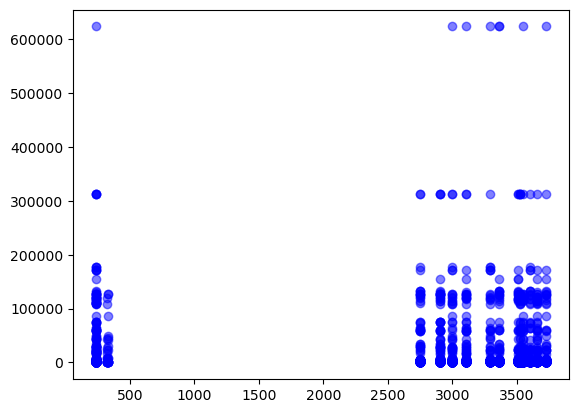

In [ ]:

plt.scatter(df_m["Rainfall"], df_m["yeild"], color="blue", alpha=0.5)
df[df["yeild"]>=600000]

In [ ]:
from scipy.constants import convert_temperature

df_ab = df.copy()

def fahrenheit_to_celsius(fahrenheit):
    return convert_temperature(fahrenheit, 'F', 'C')

x = df_ab[df_ab["Temperature"] >= 50]

for index in x.index:
    fahrenheit = df_ab.loc[index, "Temperature"]
    celsius = fahrenheit_to_celsius(fahrenheit)
    df_ab.loc[index, "Temperature"] = celsius
    print(f"دمای {fahrenheit}°F معادل {celsius:.2f}°C است.")


دمای 128.0°F معادل 53.33°C است.
دمای 129.0°F معادل 53.89°C است.
دمای 130.0°F معادل 54.44°C است.
دمای 131.0°F معادل 55.00°C است.
دمای 132.0°F معادل 55.56°C است.
دمای 133.0°F معادل 56.11°C است.
دمای 134.0°F معادل 56.67°C است.
دمای 135.0°F معادل 57.22°C است.
دمای 136.0°F معادل 57.78°C است.
دمای 137.0°F معادل 58.33°C است.
دمای 138.0°F معادل 58.89°C است.
دمای 139.0°F معادل 59.44°C است.
دمای 140.0°F معادل 60.00°C است.
دمای 141.0°F معادل 60.56°C است.
دمای 142.0°F معادل 61.11°C است.
دمای 143.0°F معادل 61.67°C است.
دمای 144.0°F معادل 62.22°C است.
دمای 145.0°F معادل 62.78°C است.
دمای 146.0°F معادل 63.33°C است.
دمای 147.0°F معادل 63.89°C است.
دمای 148.0°F معادل 64.44°C است.
دمای 149.0°F معادل 65.00°C است.
دمای 150.0°F معادل 65.56°C است.
دمای 151.0°F معادل 66.11°C است.
دمای 152.0°F معادل 66.67°C است.
دمای 153.0°F معادل 67.22°C است.
دمای 154.0°F معادل 67.78°C است.
دمای 155.0°F معادل 68.33°C است.
دمای 156.0°F معادل 68.89°C است.
دمای 157.0°F معادل 69.44°C است.
دمای 158.0°F معادل 70.00°C است.
دمای 159

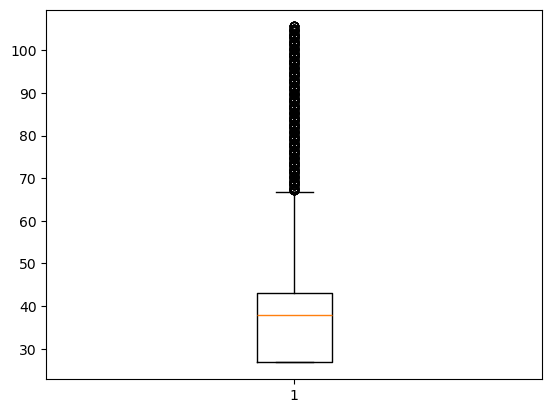

In [ ]:
plt.boxplot(df_ab["Temperature"]);

In [ ]:
df_ab["Temperature"].describe()

count    3158.000000
mean       43.245468
std        21.205428
min        26.800000
25%        27.000000
50%        38.000000
75%        43.000000
max       105.555556
Name: Temperature, dtype: float64

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
2461,2012,Hassan,51179,3729.8,26.8,Loam,Spray,71.0,55.0,Paddy,44235,Rabi
2652,2004,Raichur,103,2746.2,26.8,Sandy,Spray,3472.0,57.0,Coconut,45608,Rabi
1021,2009,Chikmangaluru,35,2996.6,26.8,Black,Basin,29.0,58.0,Coconut,216396,Rabi
1022,2010,Chikmangaluru,5974,2996.6,26.8,Black,Basin,44.0,59.0,Coconut,2644,Rabi
1023,2011,Chikmangaluru,6631,3522.8,26.8,Black,Basin,33.0,50.0,Coconut,44235,Rabi
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2004,Davangere,51040,3360.0,222.0,NaN,Drip,393.0,58.0,Cashew,43311,Zaid
2004,2013,Raichur,74,2996.6,222.0,Sandy loam,Spray,121.0,58.0,Coconut,45186,Rabi
225,2017,Hassan,6,233.0,222.0,Red laterite,Spray,864.0,57.0,Tea,761,Kharif
1645,2004,Chikmangaluru,17095,2996.6,222.0,Dry sandy,Basin,54.0,55.0,Coconut,2134,Zaid


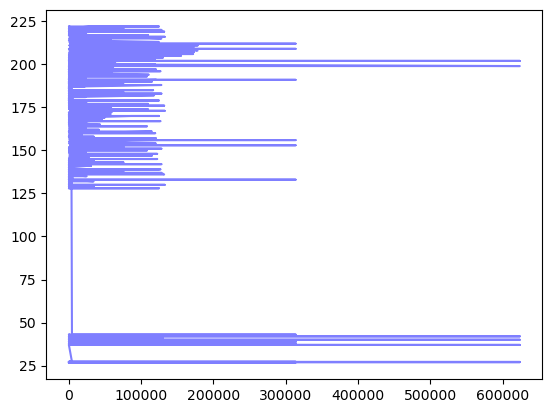

In [ ]:
df_sorted_age = df.sort_values(by='Temperature')
plt.plot(df_sorted_age["yeild"], df_sorted_age["Temperature"], color="blue", alpha=0.5)
df_sorted_age

In [ ]:
x=df[df["yeild"]>=500000]
x=x["yeild"]
for index,i in enumerate(x) :
    

SyntaxError: incomplete input (1488812326.py, line 4)

In [ ]:
from scipy.constants import convert_temperature

df_p = df.copy()

# تشخیص داده‌های بالای 45 که احتمالاً واحدشان فرق دارد
x = df_p[df_p["Temperature"] > 45]

# تبدیل آن‌ها به سانتی‌گراد
for index in x.index:
    fahrenheit = df_p.loc[index, "Temperature"]
    celsius = convert_temperature(fahrenheit, 'F', 'C')
    df_p.loc[index, "Temperature"] = celsius

df_p.describe() # خلاصه‌ای از داده‌های اصلاح‌شده


,Year,Area,Rainfall,Temperature,yeild,Humidity,price,yeild
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,1.0
mean,2009.929702,9329.913553,2813.126662,26.651012,23258.976916,55.582331,86271.279291,63687.0
std,5.100895,15180.465396,1163.829953,9.020595,58228.985033,2.469773,94123.160706,NaN
min,2004.000000,1.000000,233.000000,11.851852,2.000000,50.000000,637.000000,63687.0
25%,2004.000000,153.000000,2903.100000,18.333333,393.000000,54.000000,2644.000000,63687.0
50%,2010.000000,2127.000000,3296.000000,27.000000,2783.000000,56.000000,45186.000000,63687.0
75%,2015.000000,10910.000000,3550.000000,34.691358,6589.000000,57.000000,203317.000000,63687.0
max,2019.000000,52119.000000,3729.800000,43.000000,623687.000000,60.000000,249978.000000,63687.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18da5c45d30>,
 'caps': [<matplotlib.lines.Line2D at 0x18da59d3b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x18da5c46cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x18da5a137d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18da5a13920>],
 'means': []}

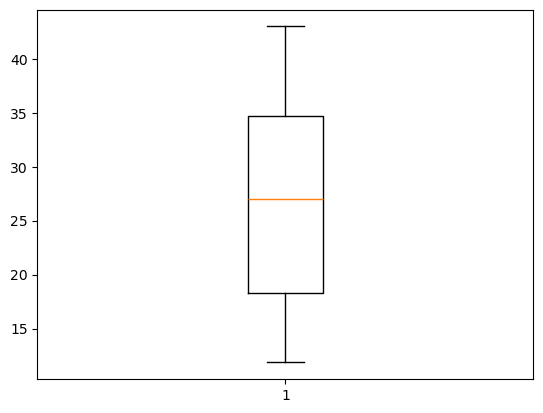

In [ ]:
plt.boxplot(df_p["Temperature"])

In [ ]:
df["Temperature"].min()

11.851851851851848

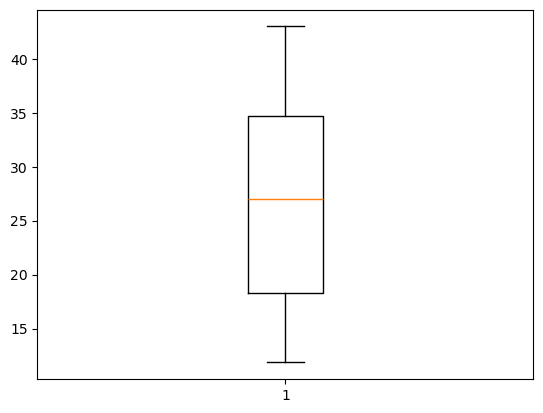

In [ ]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

chan = df.copy()

# شناسایی دماهایی که بیشتر از 50 فارنهایت هستند و تبدیل آنها به سانتی‌گراد
for index in chan.index:
    temperature = chan.loc[index, "Temperature"]
    if temperature > 50:
        celsius = fahrenheit_to_celsius(temperature)
        chan.loc[index, "Temperature"] = celsius
plt.boxplot(chan["Temperature"]);


In [ ]:
df["Temperature"].describe()

count    3158.000000
mean       26.651012
std         9.020595
min        11.851852
25%        18.333333
50%        27.000000
75%        34.691358
max        43.000000
Name: Temperature, dtype: float64

In [ ]:
describe = df.describe(include="all")
describe.style.background_gradient(cmap='coolwarm')

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season,yeild
count,3158.000000,3158,3158.000000,3158.000000,3158.000000,3100,3158,3158.000000,3158.000000,3158,3158.000000,3158,1.000000
unique,nan,11,nan,nan,nan,27,3,nan,nan,13,nan,3,nan
top,nan,Hassan,nan,nan,nan,Alluvial,Drip,nan,nan,Coconut,nan,Rabi,nan
freq,nan,798,nan,nan,nan,459,1310,nan,nan,1458,nan,1742,nan
mean,2009.929702,nan,9329.913553,2813.126662,26.651012,nan,nan,23258.976916,55.582331,nan,86271.279291,nan,63687.000000
std,5.100895,nan,15180.465396,1163.829953,9.020595,nan,nan,58228.985033,2.469773,nan,94123.160706,nan,nan
min,2004.000000,nan,1.000000,233.000000,11.851852,nan,nan,2.000000,50.000000,nan,637.000000,nan,63687.000000
25%,2004.000000,nan,153.000000,2903.100000,18.333333,nan,nan,393.000000,54.000000,nan,2644.000000,nan,63687.000000
50%,2010.000000,nan,2127.000000,3296.000000,27.000000,nan,nan,2783.000000,56.000000,nan,45186.000000,nan,63687.000000
75%,2015.000000,nan,10910.000000,3550.000000,34.691358,nan,nan,6589.000000,57.000000,nan,203317.000000,nan,63687.000000


همون اولی 

In [ ]:
import pandas as pd
from meteostat import Daily, Stations
from datetime import datetime

# کپی از دیتافریم اصلی
df_clean = df.copy()

# تنظیم بازه زمانی
start = datetime(2004, 1, 1)
end = datetime(2019, 12, 31)

# مختصات جغرافیایی مناطق
locations = {
    'Mangalore': (12.9141, 74.8560),
    'Kodagu': (12.3297, 75.7041),
    'Kasaragodu': (12.4981, 75.0305),
    'Raichur': (16.2010, 77.3564),
    'Gulbarga': (17.3404, 76.8352),
    'Madikeri': (12.4277, 75.7425),
    'Hassan': (13.0012, 76.1040),
    'Mysuru': (12.2958, 76.6394),
    'Chikmangaluru': (13.3190, 75.7769),
    'Bangalore': (12.9716, 77.5946),
    'Davangere': (14.4669, 75.9214)
}

# دریافت ایستگاه‌های هواشناسی برای هر منطقه
for city, (lat, lon) in locations.items():
    stations = Stations().nearby(lat, lon)
    station = stations.fetch()
    
    # بررسی آیا ایستگاهی پیدا شد
    if not station.empty:
        station_id = station.index[0]
        data = Daily(station_id, start, end).fetch()
        
        # اطمینان از اینکه ایندکس‌ها به فرمت سال تبدیل شوند
        data["Year"] = data.index.year
        data = data.groupby("Year").mean()  # میانگین‌گیری از داده‌های هر سال

        # جایگزینی مقادیر غیرمنطقی در داده‌های df_clean
        for index, row in df_clean[df_clean["Temperature"] > 125].iterrows():
            year = row["Year"]
            if year in data.index:
                df_clean.at[index, "Temperature"] = data.loc[year, "tavg"]

        print(f"✅ Data for {city} corrected successfully!")
    else:
        print(f"❌ No weather station found for {city}.")
    
describe = df_clean.describe(include="all")
describe.style.background_gradient(cmap='coolwarm')


In [ ]:
df = df[df["yeild"] <= 300000]

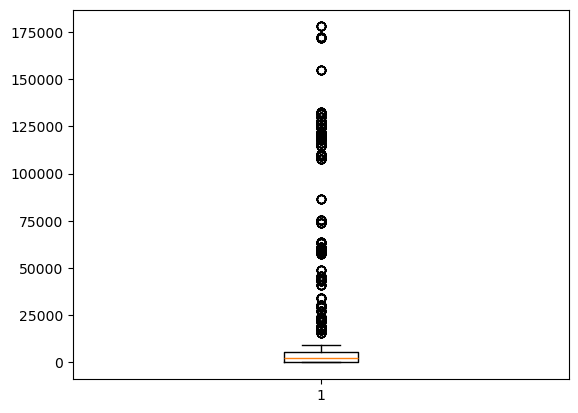

In [ ]:
plt.boxplot(df["yeild"]);

In [ ]:
df["Crops"].unique()

array(['Coconut', 'Cocoa', 'Coffee', 'Cardamum', 'Pepper', 'Arecanut',
       'Ginger', 'Tea', 'Paddy', 'Groundnut', 'Blackgram', 'Cashew',
       'Cotton'], dtype=object)

In [ ]:
df_yy=df.copy()
# تعریف بازه‌های منطقی بازدهی برای هر محصول (تن بر هکتار)
yeild_ranges = {
    'Coconut': (5, 15),      # نارگیل: 5 تا 15 تن بر هکتار
    'Paddy': (3, 8),         # برنج: 3 تا 8 تن بر هکتار
    'Tea': (1, 2),           # چای: 1 تا 2 تن بر هکتار
    'Blackgram': (1, 2),     # بلک‌گرام: 1 تا 2 تن بر هکتار
    'Groundnut': (1, 3),     # بادام‌زمینی: 1 تا 3 تن بر هکتار
    'Coffee': (1, 2),        # قهوه: 1 تا 2 تن بر هکتار
    'Cocoa': (0.5, 1.5),     # کاکائو: 0.5 تا 1.5 تن بر هکتار
    'Cardamom': (0.1, 0.5),  # هل: 0.1 تا 0.5 تن بر هکتار
    'Pepper': (0.5, 1),      # فلفل: 0.5 تا 1 تن بر هکتار
    'Areca nut': (1, 2),     # آرکنات: 1 تا 2 تن بر هکتار
    'Cashew': (0.5, 1),      # کاجو: 0.5 تا 1 تن بر هکتار
    'Cotton': (1, 3)         # پنبه: 1 تا 3 تن بر هکتار
}

# محاسبه بازدهی به ازای هر هکتار
df_yy['yeild_per_Hectare'] = df_yy['yeild'] / df_yy['Area']

# تابع برای شناسایی پرت‌ها
def is_outlier(row):
    crop = row['Crops']
    yeild_per_hectare = row['yeild_per_Hectare']
    
    # اگه محصول تو دیکشنری بازه‌ها باشه
    if crop in yeild_ranges:
        min_yeild, max_yeild = yeild_ranges[crop]
        # اگه بازدهی خارج از بازه باشه، پرت محسوب می‌شه
        return yeild_per_hectare < min_yeild or yeild_per_hectare > max_yeild
    return False  # اگه محصول تو لیست نبود، پرت حساب نمی‌شه

# شناسایی پرت‌ها
df_yy['Is_Outlier'] = df_yy.apply(is_outlier, axis=1)

# نمایش داده‌های پرت
outliers = df_yy[df_yy['Is_Outlier']]
print("داده‌های پرت:")
print(outliers[['Crops', 'Area', 'yeild', 'yeild_per_Hectare']])

# حذف پرت‌ها و نگه‌داری داده‌های تمیز
clean_df_yy = df_yy[~df_yy['Is_Outlier']]
print("\nداده‌های تمیز شده (بدون پرت):")
print(clean_df_yy[['Crops', 'Area', 'yeild', 'yeild_per_Hectare']])

# ذخیره داده‌های تمیز شده تو یه فایل جدید
clean_df_yy.to_csv('cleaned_df_yy.csv', index=False)
print("\nداده‌های تمیز شده تو فایل 'cleaned_df_yy.csv' ذخیره شدند.")

داده‌های پرت:
        Crops   Area    yeild  yeild_per_Hectare
0     Coconut   1279    2570.0            2.009382
1     Coconut  13283   27170.0            2.045472
2     Coconut  52119  114744.0            2.201577
3     Coconut    725    1402.0            1.933793
4     Coconut  12885   23456.0            1.820411
...       ...    ...       ...                 ...
3150  Coconut  47200  114744.0            2.431017
3152  Coconut   8982   23456.0            2.611445
3153  Coconut  46990  107809.0            2.294297
3155  Coconut   8239   23960.0            2.908120
3156  Coconut  44563  126487.0            2.838386

[2340 rows x 4 columns]

داده‌های تمیز شده (بدون پرت):
          Crops  Area   yeild  yeild_per_Hectare
46      Coconut  4930  41266.0            8.370385
49      Coconut  5127  42915.0            8.370392
51      Coconut  5294  44313.0            8.370419
52      Coconut  5474  45820.0            8.370479
53      Coconut  5864  49084.0            8.370396
...         ... 

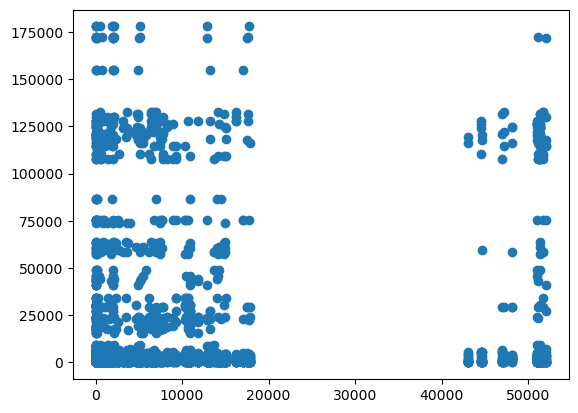

In [ ]:
plt.scatter(df_yy["Area"],df_yy["yeild"])

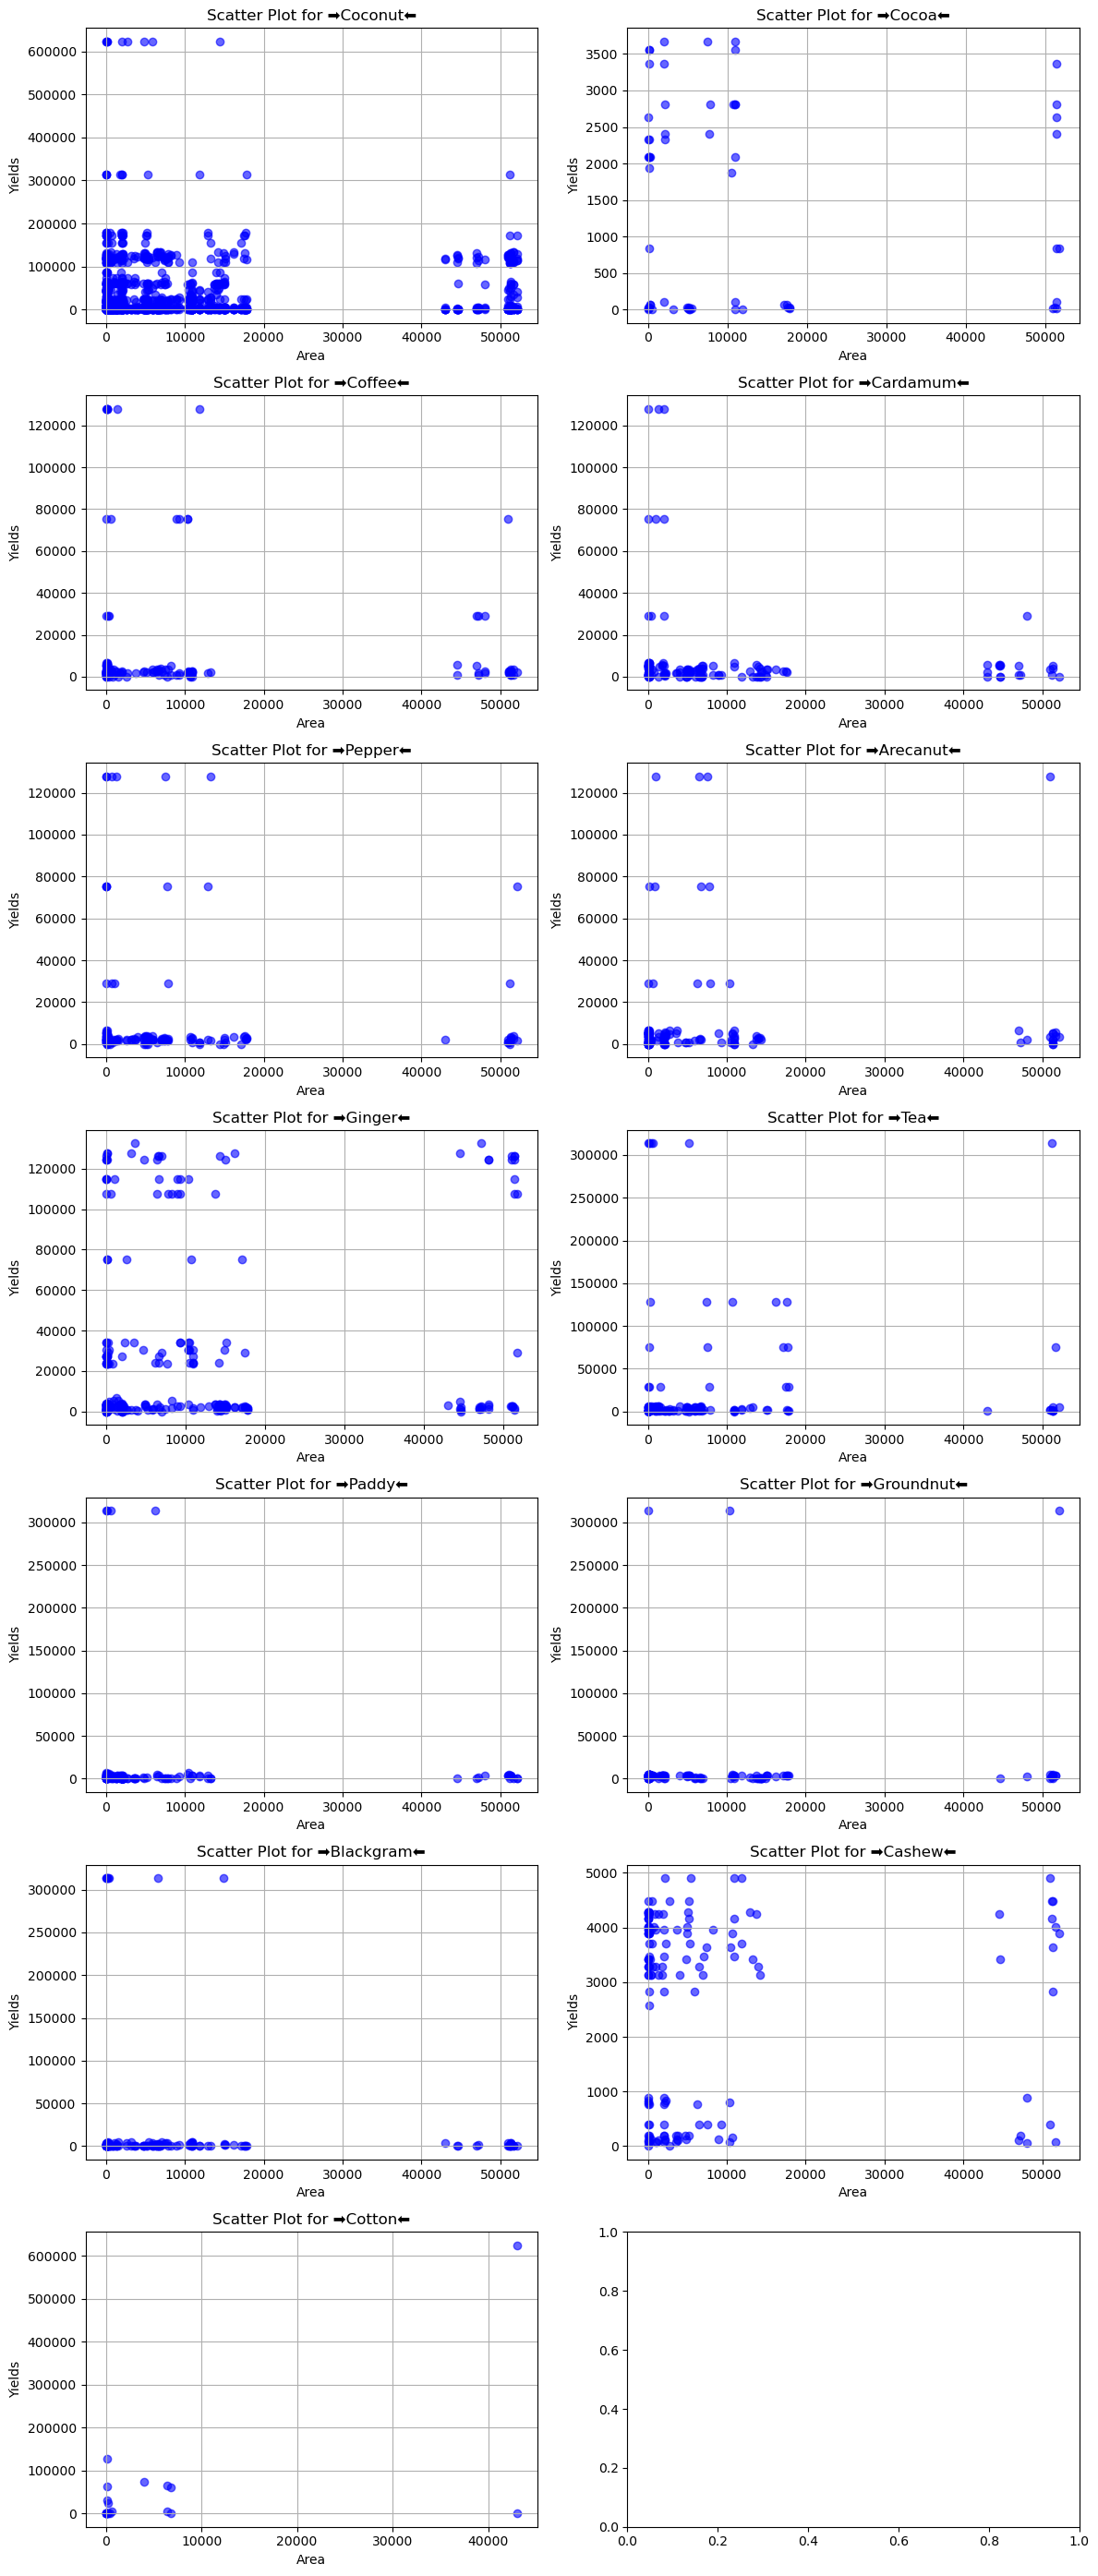

In [ ]:

import matplotlib.pyplot as plt

# تعداد محصولات
num_plots = len(df["Crops"].unique())

# تنظیم تعداد ردیف و ستون برای subplot
rows =7  # برای تنظیم تعداد ردیف‌ها
cols = 2  # تعداد ستون‌ها به دلخواه

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

# اگر بیشتر از یک سطر داریم، axes ممکن است آرایه‌ای دوبعدی باشد
axes = axes.flatten()  # تبدیل به یک آرایه یک‌بعدی برای راحتی دسترسی

for idx, i in enumerate(df["Crops"].unique()):
    x = df[df["Crops"] == i]  # فیلتر کردن داده‌ها برای هر محصول
    ax = axes[idx]  # انتخاب زیرنمودار مربوط به این محصول
    ax.scatter(x["Area"], x["yeild"], color="b", alpha=0.6)  # رسم نقاط
    ax.set_xlabel("Area")
    ax.set_ylabel("Yields")
    ax.set_title(f"Scatter Plot for ➡️{i}⬅️")
    ax.grid(True)  # اضافه کردن خطوط شبکه برای خوانایی بهتر



plt.tight_layout()  # تنظیم فاصله‌ها برای نمایش بهتر
plt.show()



<Axes: xlabel='Area', ylabel='yeild'>

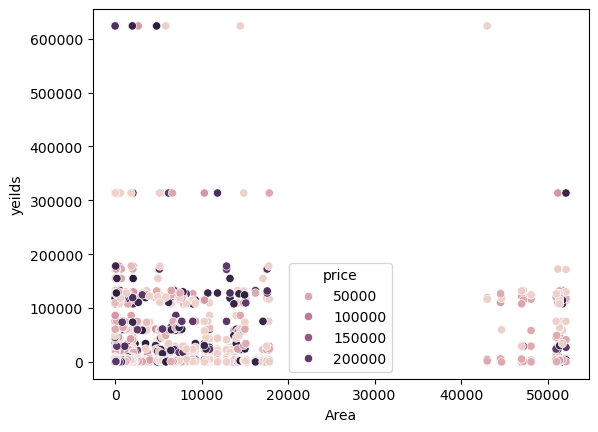

In [ ]:
sns.scatterplot(x=df["Area"], y=df["yeild"], hue=df["price"]) 

<Figure size 2000x2000 with 0 Axes>

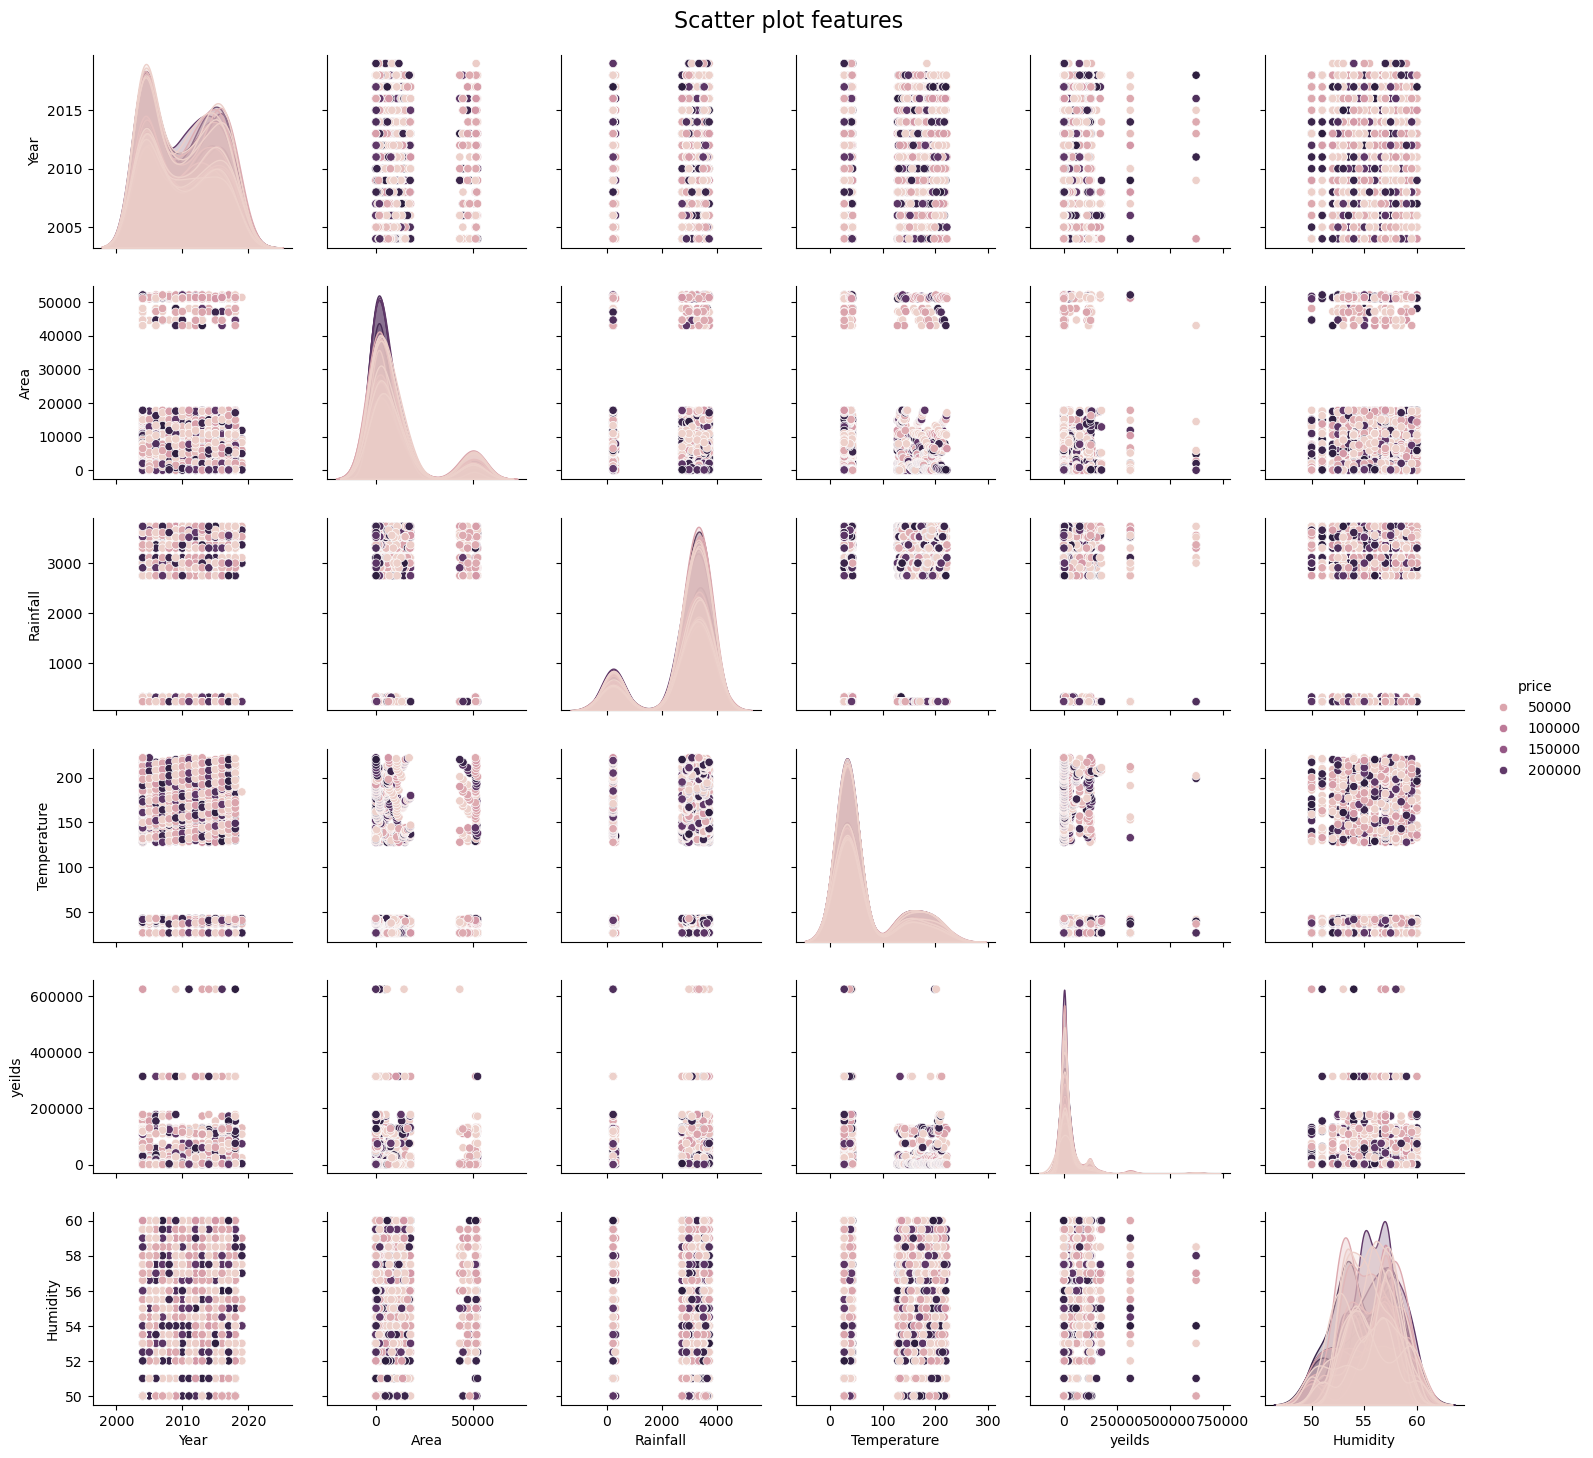

In [ ]:
plt.figure(figsize=(20,20))
cols = df.columns
sns.pairplot(df[cols],
            hue='price')
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.2)
plt.suptitle('Scatter plot features',fontweight = 20, fontsize = 16)
plt.show()


In [ ]:
x

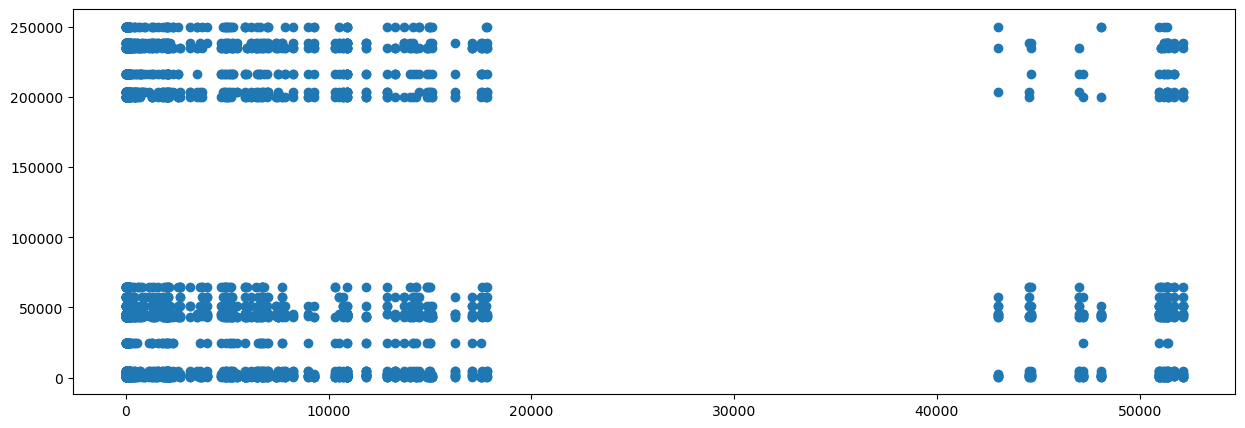

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(x["Area"],x["price"])

In [1]:
import requests
import pandas as pd
import time
from datetime import datetime
import logging
from concurrent.futures import ThreadPoolExecutor
from functools import lru_cache
import os

# تنظیمات ثبت خطاها با logging
logging.basicConfig(filename='weather_update.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# خواندن دیتاست
df = pd.read_csv("E:/csv/data_season.csv")

# مختصات جغرافیایی مکان‌ها
locations = {
    'Mangalore': (12.9141, 74.8560),
    'Kodagu': (12.3297, 75.7041),
    'Kasaragodu': (12.4981, 75.0305),
    'Raichur': (16.2010, 77.3564),
    'Gulbarga': (17.3404, 76.8352),
    'Madikeri': (12.4277, 75.7425),
    'Hassan': (13.0012, 76.1040),
    'Mysuru': (12.2958, 76.6394),
    'Chikmangaluru': (13.3190, 75.7769),
    'Bangalore': (12.9716, 77.5946),
    'Davangere': (14.4669, 75.9214)
}

# مختصات جغرافیایی شهرهای نزدیک به هر مکان
nearby_locations = {
    'Mangalore': ['Kodagu', 'Kasaragodu', 'Hassan'],
    'Kodagu': ['Mangalore', 'Madikeri', 'Hassan'],
    'Kasaragodu': ['Mangalore', 'Kodagu', 'Chikmangaluru'],
    'Raichur': ['Gulbarga', 'Davangere'],
    'Gulbarga': ['Raichur', 'Davangere'],
    'Madikeri': ['Kodagu', 'Mysuru'],
    'Hassan': ['Mangalore', 'Kodagu', 'Mysuru'],
    'Mysuru': ['Hassan', 'Kodagu'],
    'Chikmangaluru': ['Kasaragodu', 'Mangalore'],
    'Bangalore': ['Mysuru', 'Hassan'],
    'Davangere': ['Raichur', 'Gulbarga']
}

# تابع تعیین فصل
def get_season(month):
    if month in [7, 8, 9, 10, 11]:  # Kharif: جولای تا نوامبر
        return 'Kharif'
    elif month in [12, 1, 2, 3, 4]:  # Rabi: دسامبر تا آوریل
        return 'Rabi'
    else:  # Zaid: مه و ژوئن
        return 'Zaid'

# استفاده از کش برای ذخیره‌سازی داده‌های API
@lru_cache(maxsize=128)
def get_temperature(lat, lon, year, season):
    url = "https://archive-api.open-meteo.com/v1/archive"
    if season == 'Kharif':
        start_date, end_date = f"{year}-07-01", f"{year}-11-30"
    elif season == 'Rabi':
        start_date, end_date = f"{year}-12-01", f"{year+1}-04-30"
    else:  # Zaid
        start_date, end_date = f"{year}-05-01", f"{year}-06-30"
    
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "temperature_2m_max,temperature_2m_min",
        "timezone": "Asia/Kolkata"
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # بررسی و محاسبه میانگین دمای بیشینه و کمینه
        max_temps = data.get("daily", {}).get("temperature_2m_max", [])
        min_temps = data.get("daily", {}).get("temperature_2m_min", [])
        
        if max_temps and min_temps:
            avg_temp = round((sum(max_temps) + sum(min_temps)) / (2 * len(max_temps)), 2)
            return avg_temp
        else:
            return None
    except requests.exceptions.RequestException as e:
        logging.error(f"Error fetching data for {lat}, {lon}, {year}, {season}: {e}")
        return None

# دریافت دما از شهرهای نزدیک
def get_nearby_temperature(row):
    location = row['Location']
    year = int(row['Year'])
    season = row['Season']
    
    if location in locations:
        lat, lon = locations[location]
        
        # سعی می‌کنیم ابتدا دما را برای همان موقعیت دریافت کنیم
        temp = get_temperature(lat, lon, year, season)
        
        if temp is None:
            # اگر نتوانستیم دما را دریافت کنیم، دماهای شهرهای نزدیک را بررسی می‌کنیم
            for nearby_location in nearby_locations.get(location, []):
                nearby_lat, nearby_lon = locations[nearby_location]
                temp = get_temperature(nearby_lat, nearby_lon, year, season)
                if temp is not None:
                    logging.info(f"Used nearby location {nearby_location} for {location}, {year}, {season}")
                    break
        
        return temp
    return None

# بروزرسانی دما در دیتاست
def update_temperatures(df):
    df['Temperature'] = df.apply(get_nearby_temperature, axis=1)
    return df

# اجرای بروزرسانی
df = update_temperatures(df)

# ذخیره دیتاست جدید
df.to_csv('E:/csv/updated_data_season.csv', index=False)

logging.info("Dataset updated successfully!")
print("Dataset updated successfully!")
df.describe()
df["Temperature"]

Dataset updated successfully!


0       26.03
1       26.03
2       26.03
3       26.03
4       26.03
        ...  
3153    25.74
3154    25.50
3155    27.22
3156    26.65
3157    26.00
Name: Temperature, Length: 3158, dtype: float64

In [4]:
df["Location"].unique()

array(['Mangalore', 'Kodagu', 'Kasaragodu', 'Raichur', 'Gulbarga',
       'Madikeri', 'Hassan', 'Mysuru', 'Chikmangaluru', 'Bangalore',
       'Davangere'], dtype=object)

In [8]:
import pandas as pd
import requests
import numpy as np
from math import radians, cos, sin, asin, sqrt
import time  # برای مدیریت زمان

# دیکشنری مختصات مناطق
locations = {
    'Mangalore': (12.915605, 74.855965),
    'Kodagu': (12.4208, 75.7397),
    'Kasaragodu': (12.5000, 75.0000),
    'Raichur': (16.2000, 77.3667),
    'Gulbarga': (17.3358, 76.8376),
    'Madikeri': (12.427189, 75.747643),
    'Hassan': (13.00715, 76.0962),
    'Mysuru': (12.295810, 76.639381),
    'Chikmangaluru': (13.3223, 75.7370),
    'Bangalore': (12.972442, 77.580643),
    'Davangere': (14.470586, 75.914154)
}

def get_date_range(year, season):
    if season == 'Kharif':
        start = f"{year}0601"
        end = f"{year}1031"
    elif season == 'Rabi':
        start = f"{year}1101"
        end = f"{year+1}0331"
    elif season == 'Zaid':
        start = f"{year}0401"
        end = f"{year}0630"
    else:
        raise ValueError("فصل ناشناخته")
    return start, end

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

def fetch_temperature(lat, lon, start, end):
    # تلاش اول: NASA POWER API
    nasa_url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M&community=AG&longitude={lon}&latitude={lat}&start={start}&end={end}&format=JSON"
    try:
        response = requests.get(nasa_url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            t2m = data['properties']['parameter']['T2M']
            temperatures = [v for v in t2m.values() if v != -999]
            if temperatures:
                return np.mean(temperatures)
    except Exception as e:
        print(f"خطای NASA API برای lat={lat}, lon={lon}, start={start}, end={end}: {e}")

    # تلاش دوم: Meteostat API
    meteostat_api_key = "f0cc61b02cmshb7169759b8ce1b9p1e76f0jsn87d8d6c3bf42"  # اینجا کلید واقعی Meteostat خودت رو بذار
    meteostat_url = f"https://api.meteostat.net/v2/point/daily?lat={lat}&lon={lon}&start={start[:4]}-{start[4:6]}-{start[6:8]}&end={end[:4]}-{end[4:6]}-{end[6:8]}"
    headers = {"x-api-key": meteostat_api_key}
    try:
        response = requests.get(meteostat_url, headers=headers, timeout=10)
        if response.status_code == 200:
            data = response.json()
            if 'data' in data and data['data']:
                temperatures = [float(day['tavg']) for day in data['data'] if 'tavg' in day and day['tavg'] is not None]
                if temperatures:
                    return np.mean(temperatures)
    except Exception as e:
        print(f"خطای Meteostat API برای lat={lat}, lon={lon}, start={start}, end={end}: {e}")

    return None

# فرض می‌کنیم df_slam دیتاست شماست
df = pd.read_csv('data_season.csv')
df_slam=df.copy()
unique_combos = df_slam[['Location', 'Year', 'Season']].drop_duplicates().reset_index(drop=True)
unique_combos['lat'] = unique_combos['Location'].map(lambda x: locations[x][0])
unique_combos['lon'] = unique_combos['Location'].map(lambda x: locations[x][1])
unique_combos['start_date'], unique_combos['end_date'] = zip(*unique_combos.apply(
    lambda row: get_date_range(row['Year'], row['Season']), axis=1))

temperatures = []
request_count = 0  # شمارش تعداد درخواست‌ها
batch_size = 60   # هر 60 درخواست
pause_time = 60   # 60 ثانیه (1 دقیقه) توقف

for index, row in unique_combos.iterrows():
    temp = fetch_temperature(row['lat'], row['lon'], row['start_date'], row['end_date'])
    temperatures.append(temp)
    request_count += 1
    
    # چک کردن تعداد درخواست‌ها و توقف
    if request_count % batch_size == 0:
        print(f"درخواست {request_count} انجام شد. 1 دقیقه صبر می‌کنم...")
        time.sleep(pause_time)

    if temp is None:
        print(f"داده‌ای برای {row['Location']}, {row['Year']}, {row['Season']} پیدا نشد")

unique_combos['correct_temperature'] = temperatures

for index, row in unique_combos.iterrows():
    if pd.isna(row['correct_temperature']):
        candidates = unique_combos[
            (unique_combos['Year'] == row['Year']) &
            (unique_combos['Season'] == row['Season']) &
            unique_combos['correct_temperature'].notna()
        ]
        if not candidates.empty:
            distances = candidates.apply(
                lambda cand: haversine(row['lat'], row['lon'], cand['lat'], cand['lon']), axis=1)
            min_idx = distances.idxmin()
            nearest_temp = candidates.loc[min_idx, 'correct_temperature']
            unique_combos.at[index, 'correct_temperature'] = nearest_temp
        else:
            print(f"هیچ داده‌ای برای {row['Year']}, {row['Season']} پیدا نشد")

df_slam = df_slam.merge(unique_combos[['Location', 'Year', 'Season', 'correct_temperature']],
              on=['Location', 'Year', 'Season'], how='left')
df_slam['Temperature'] = np.where(df_slam['Temperature'] > 125, df_slam['correct_temperature'], df_slam['Temperature'])
df_slam.drop('correct_temperature', axis=1, inplace=True)
# df_slam.to_csv('corrected_dataset.csv', index=False)

داده‌ای برای Gulbarga, 2012, Kharif پیدا نشد
درخواست 60 انجام شد. 1 دقیقه صبر می‌کنم...
داده‌ای برای Mangalore, 2017, Kharif پیدا نشد
داده‌ای برای Mangalore, 2018, Kharif پیدا نشد
داده‌ای برای Mysuru, 2015, Kharif پیدا نشد
درخواست 120 انجام شد. 1 دقیقه صبر می‌کنم...
داده‌ای برای Kodagu, 2015, Rabi پیدا نشد
درخواست 180 انجام شد. 1 دقیقه صبر می‌کنم...
داده‌ای برای Kasaragodu, 2010, Rabi پیدا نشد
داده‌ای برای Kasaragodu, 2008, Rabi پیدا نشد
داده‌ای برای Raichur, 2012, Rabi پیدا نشد
داده‌ای برای Raichur, 2014, Rabi پیدا نشد
درخواست 240 انجام شد. 1 دقیقه صبر می‌کنم...
داده‌ای برای Madikeri, 2018, Rabi پیدا نشد
داده‌ای برای Madikeri, 2004, Rabi پیدا نشد
داده‌ای برای Chikmangaluru, 2009, Rabi پیدا نشد
داده‌ای برای Raichur, 2004, Zaid پیدا نشد
داده‌ای برای Kasaragodu, 2005, Zaid پیدا نشد
درخواست 300 انجام شد. 1 دقیقه صبر می‌کنم...
داده‌ای برای Kasaragodu, 2018, Zaid پیدا نشد
داده‌ای برای Chikmangaluru, 2013, Zaid پیدا نشد
داده‌ای برای Hassan, 2005, Zaid پیدا نشد
درخواست 360 انجام شد. 1 دقیقه ص

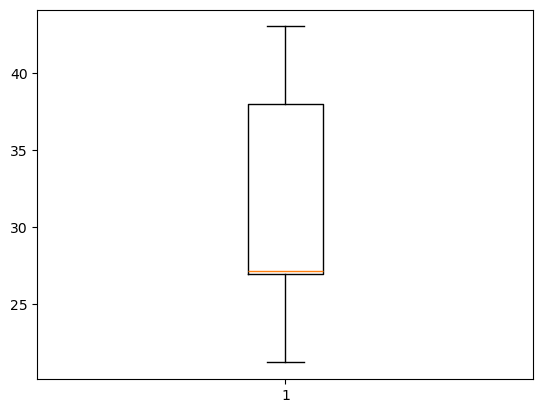

In [31]:
import matplotlib.pyplot as plt 
plt.boxplot(df_slam["Temperature"]);

In [9]:
describe = df_slam.describe(include="all")
describe.style.background_gradient(cmap='coolwarm')

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
count,3158.000000,3158,3158.000000,3158.000000,3158.000000,3100,3158,3158.000000,3158.000000,3158,3158.000000,3158
unique,nan,11,nan,nan,nan,27,3,nan,nan,13,nan,3
top,nan,Hassan,nan,nan,nan,Alluvial,Drip,nan,nan,Coconut,nan,Rabi
freq,nan,798,nan,nan,nan,459,1310,nan,nan,1458,nan,1742
mean,2009.929702,nan,9329.913553,2813.126662,30.944983,nan,nan,23258.976916,55.582331,nan,86271.279291,nan
std,5.100895,nan,15180.465396,1163.829953,6.406735,nan,nan,58228.985033,2.469773,nan,94123.160706,nan
min,2004.000000,nan,1.000000,233.000000,21.241523,nan,nan,2.000000,50.000000,nan,637.000000,nan
25%,2004.000000,nan,153.000000,2903.100000,27.000000,nan,nan,393.000000,54.000000,nan,2644.000000,nan
50%,2010.000000,nan,2127.000000,3296.000000,27.133516,nan,nan,2783.000000,56.000000,nan,45186.000000,nan
75%,2015.000000,nan,10910.000000,3550.000000,38.000000,nan,nan,6589.000000,57.000000,nan,203317.000000,nan


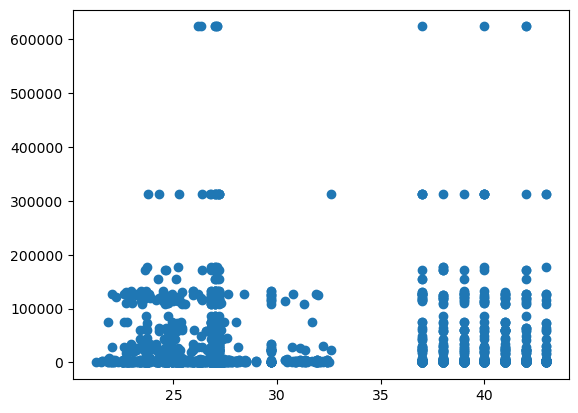

In [35]:
plt.scatter(df_slam["Temperature"],df_slam["yeild"]);

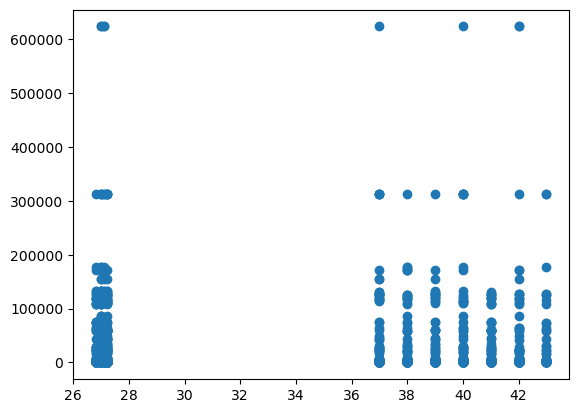

In [37]:
df=df[df["Temperature"]<125]
plt.scatter(df["Temperature"],df["yeild"]);

In [7]:
df["Temperature"].value_counts()

Temperature
23.44    148
29.71    115
23.62     92
26.54     73
22.60     70
        ... 
23.48      1
23.04      1
23.32      1
23.65      1
26.00      1
Name: count, Length: 337, dtype: int64

C:\Users\abolfazl\AppData\Local\Temp\ipykernel_1996\1554462001.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', ncols=3)


ValueError: Axis limits cannot be NaN or Inf

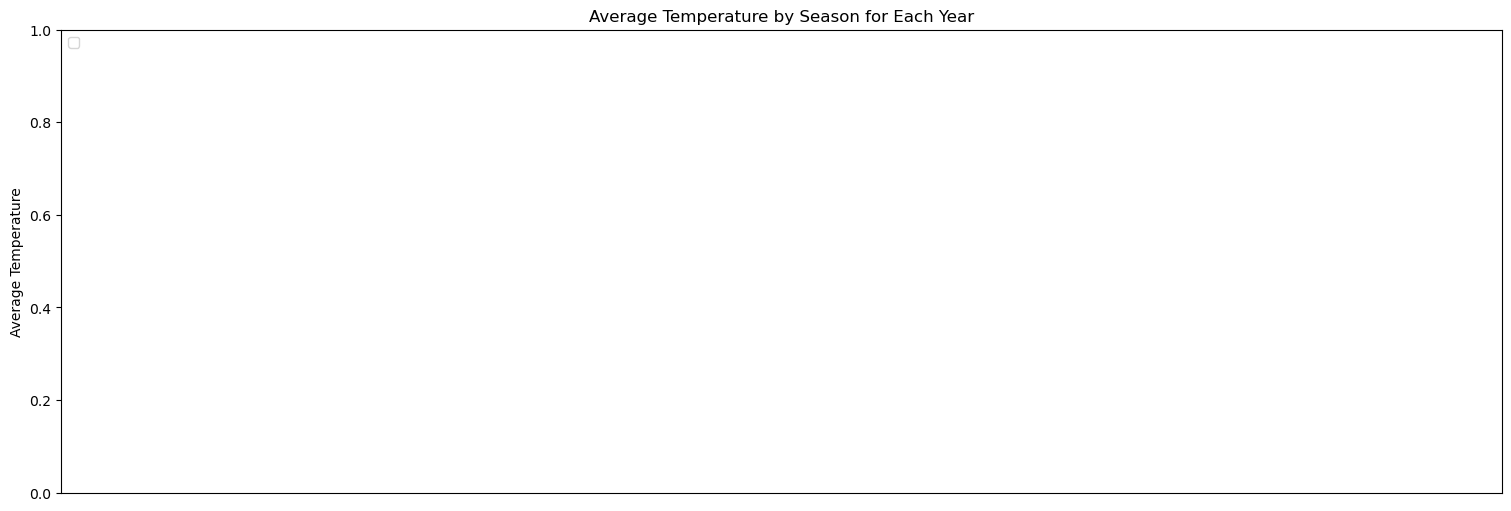

In [ ]:
df["Season"].unique()

array(['Kharif', 'Rabi', 'Zaid'], dtype=object)

In [ ]:
# df.drop(df[df["yeild"] > 300000].index, inplace=True)
df["t"]

<Axes: >

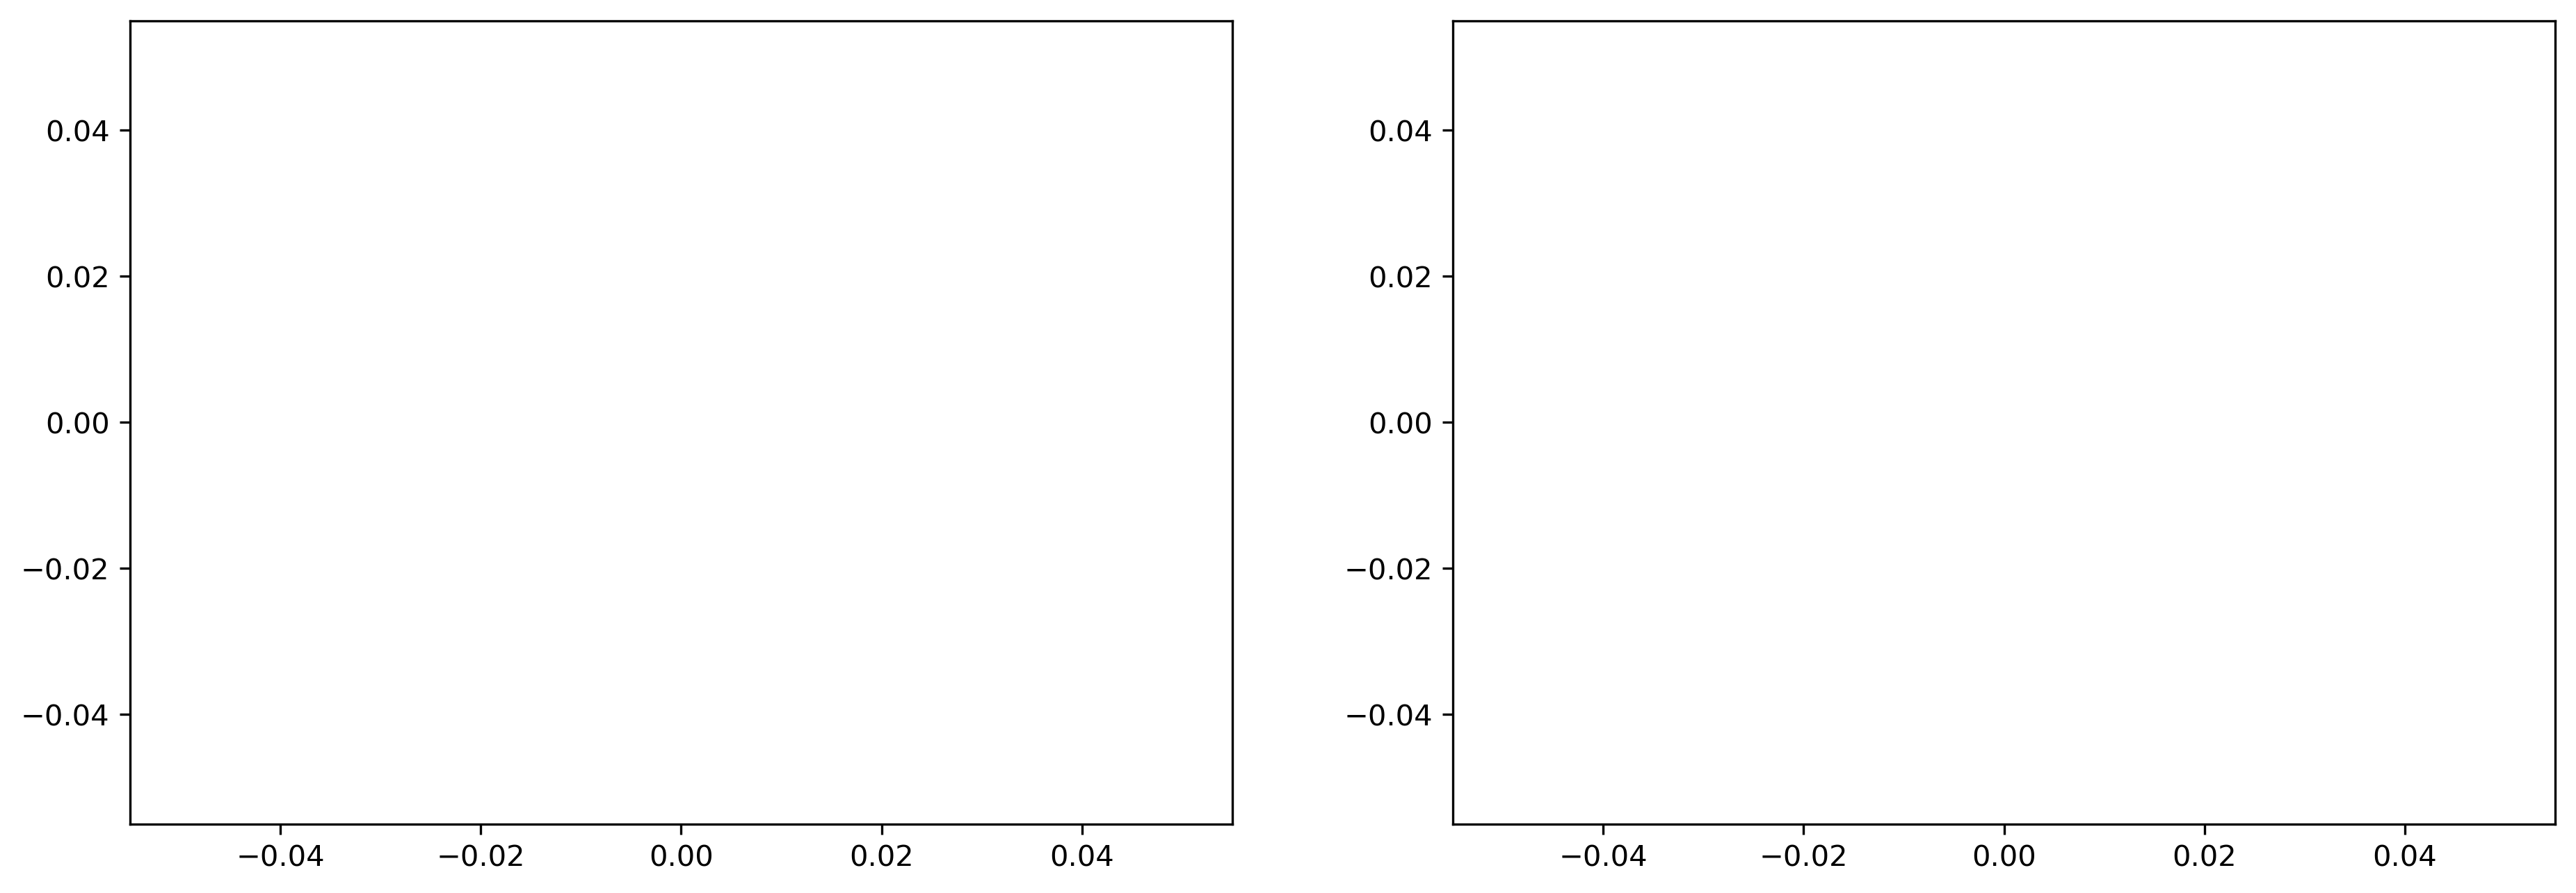

In [ ]:
import seaborn as sns
fig,adf=plt.subplots(1,2,dpi=300,figsize=(15,5))
adf[0].scatter(df["Temperature"],df["yeild"])
sns.histplot(df["Temperature"],bins=30,kde=True,adf=adf[1])


In [38]:
data=pd.read_csv("E:/csv/updated_data_season.csv")

In [39]:
data.describe()

,Year,Area,Rainfall,Temperature,yeild,Humidity,price
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2009.929702,9329.913553,2813.126662,24.969778,23258.976916,55.582331,86271.279291
std,5.100895,15180.465396,1163.829953,2.560875,58228.985033,2.469773,94123.160706
min,2004.000000,1.000000,233.000000,20.200000,2.000000,50.000000,637.000000
25%,2004.000000,153.000000,2903.100000,22.870000,393.000000,54.000000,2644.000000
50%,2010.000000,2127.000000,3296.000000,24.120000,2783.000000,56.000000,45186.000000
75%,2015.000000,10910.000000,3550.000000,26.910000,6589.000000,57.000000,203317.000000
max,2019.000000,52119.000000,3729.800000,32.660000,623687.000000,60.000000,249978.000000


In [43]:
df_cop=data.copy()
df_cop.drop(df_cop[df_cop["yeild"] > 300000].index, inplace=True)
df_cop.describe()

,Year,Area,Rainfall,Temperature,yeild,Humidity,price
count,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000
mean,2009.925273,9348.738614,2813.505228,24.969339,18540.272322,55.582328,86387.616742
std,5.104415,15186.646772,1163.272423,2.557040,38002.720444,2.471145,94173.607073
min,2004.000000,1.000000,233.000000,20.200000,2.000000,50.000000,637.000000
25%,2004.000000,153.000000,2903.100000,22.872500,393.000000,54.000000,2644.000000
50%,2010.000000,2188.000000,3296.000000,24.120000,2628.000000,56.000000,45186.000000
75%,2015.000000,10910.000000,3550.000000,26.910000,5518.000000,57.000000,203317.000000
max,2019.000000,52119.000000,3729.800000,32.660000,177939.000000,60.000000,249978.000000


In [42]:
gng=pd.read_csv("karnataka.csv")

In [57]:
df["Temperature"].unique()
df = df[df["Temperature"] != "?"]
df.dropna(inplace=True)
df["Temperature"]=df["Temperature"].astype(float)

df["yeild"].unique()
df = df[df["yeild"] != "_"]
df.dropna(inplace=True)
df["yeild"]=df["yeild"].astype(float)

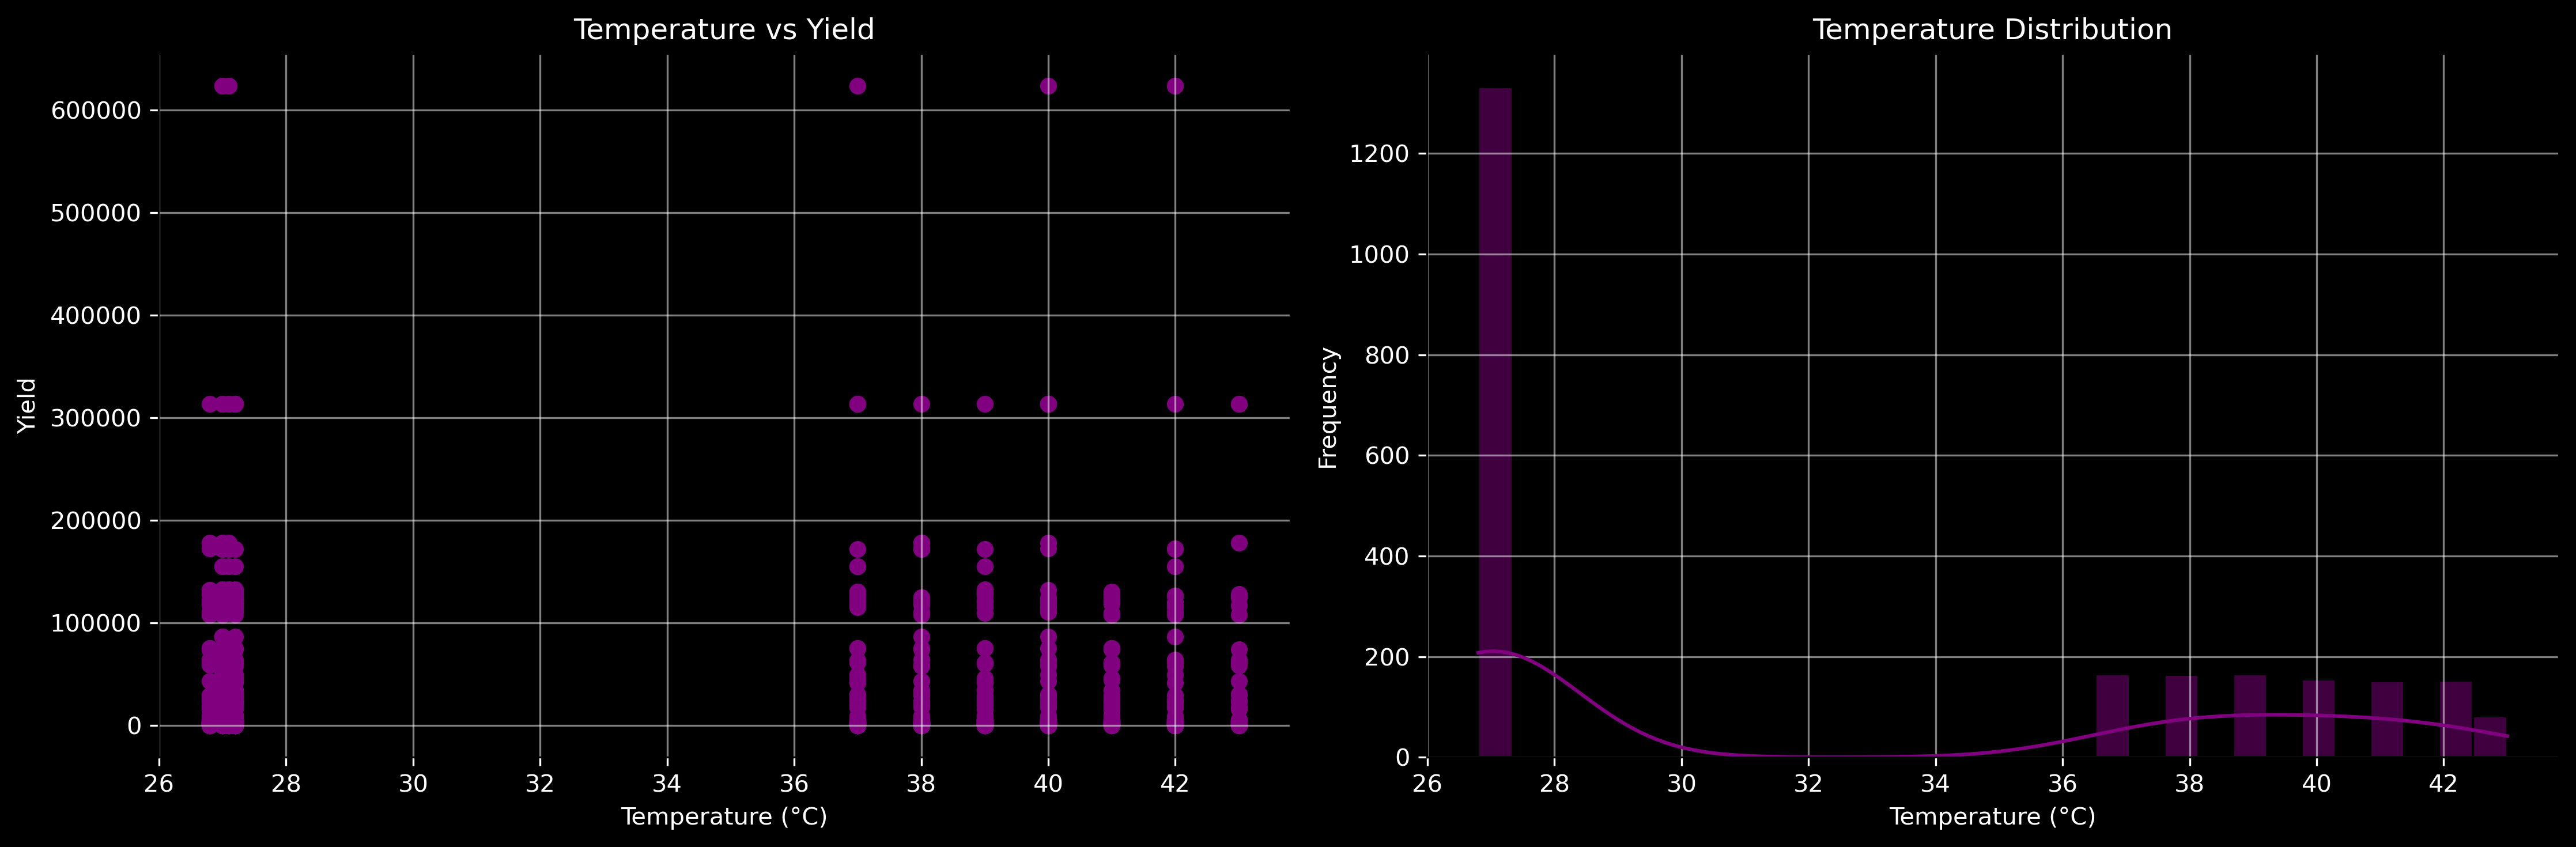

In [83]:
# فرض بر این است که داده‌ها در df قرار دارند
df = df[df["Temperature"] < 125]

# ایجاد گراف
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(15, 5))

# تغییر رنگ پس‌زمینه گراف‌ها
fig.patch.set_facecolor("black")
ax[0].patch.set_facecolor("black")
ax[1].patch.set_facecolor("black")

# نمودار پراکندگی
ax[0].scatter(df["Temperature"], df["yeild"], color="purple")
ax[0].set_title("Temperature vs Yield", color="white")
ax[0].set_xlabel("Temperature (°C)", color="white")
ax[0].set_ylabel("Yield", color="white")
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')

# هیستوگرام همراه با KDE
sns.histplot(df["Temperature"], bins=30, kde=True, ax=ax[1], color="purple")
ax[1].set_title("Temperature Distribution", color="white")
ax[1].set_xlabel("Temperature (°C)", color="white")
ax[1].set_ylabel("Frequency", color="white")

ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')

# اضافه کردن شبکه‌ها به گراف اول
ax[0].grid(True, color='white',alpha=0.5)
ax[1].grid(True, color='white',alpha=0.5)

plt.tight_layout()
plt.show()


NameError: name 'df_cop' is not defined

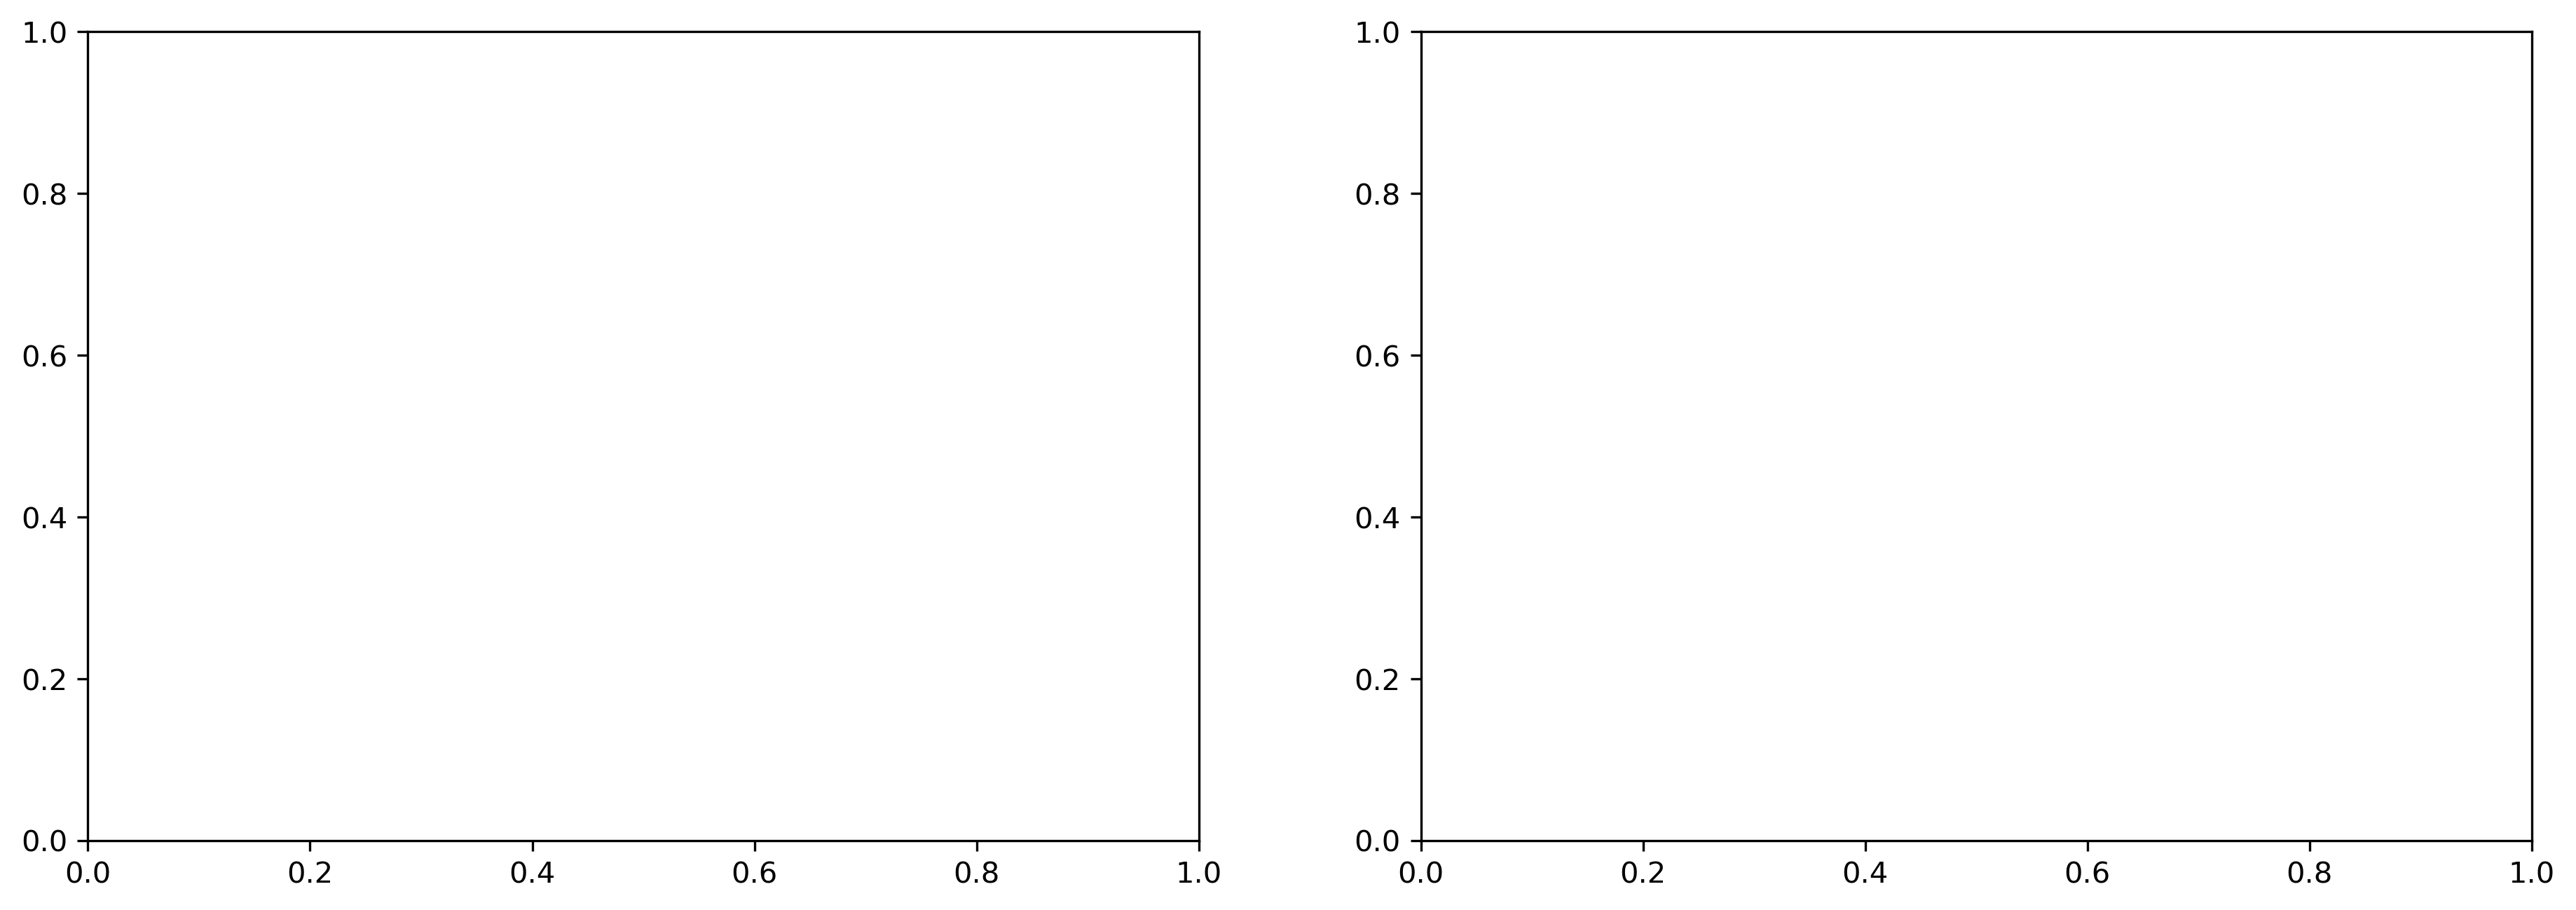

In [86]:

fig,ax=plt.subplots(1,2,dpi=300,figsize=(15,5))
ax[0].scatter(df_cop["Temperature"],df_cop["yeild"]);
sns.histplot(df_cop["Temperature"],bins=30,kde=True,ax=ax[1]);

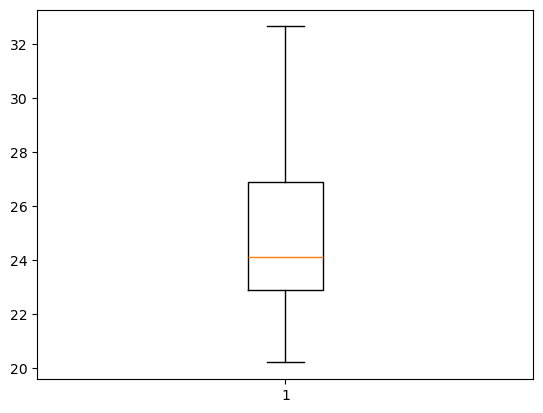

In [ ]:
plt.boxplot(df_cop["Temperature"]);

In [ ]:
df_cop["Location"].unique()

array(['Mangalore', 'Kodagu', 'Kasaragodu', 'Raichur', 'Gulbarga',
       'Madikeri', 'Hassan', 'Mysuru', 'Chikmangaluru', 'Bangalore',
       'Davangere'], dtype=object)

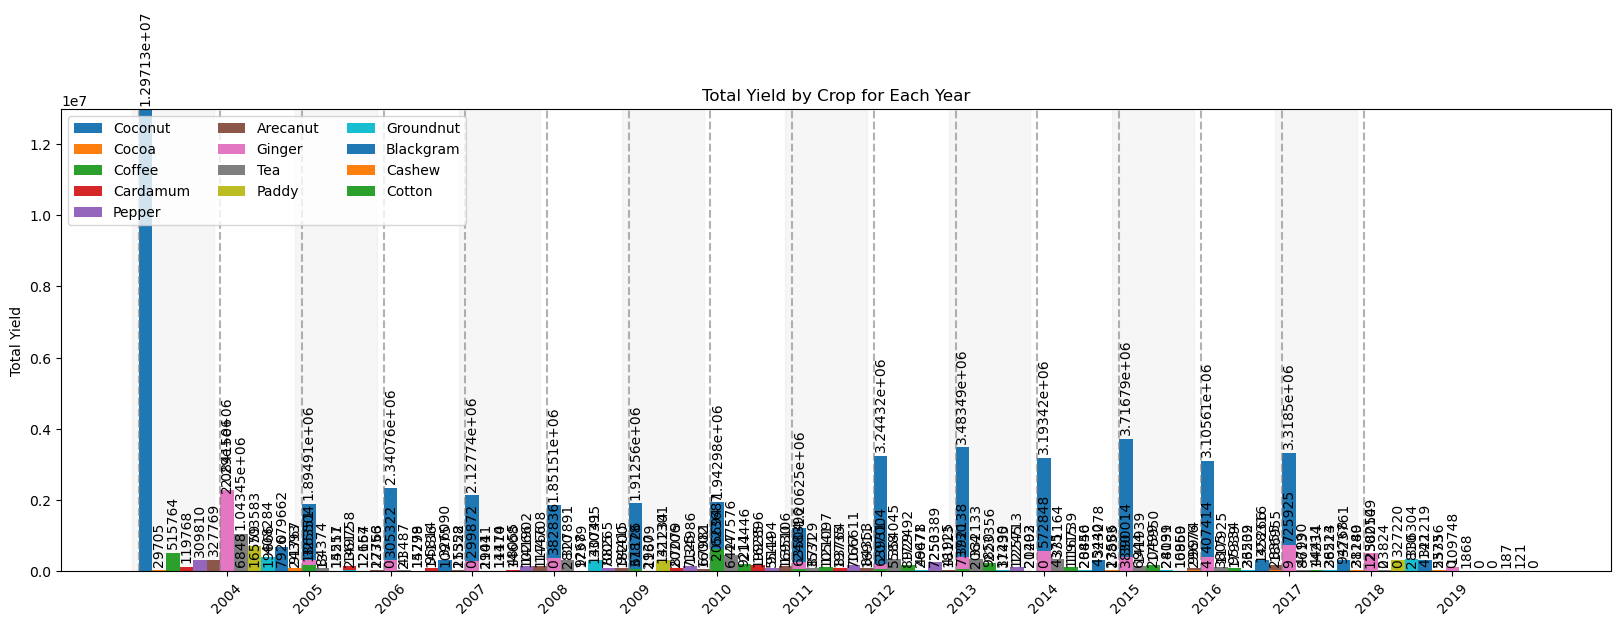

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

# خواندن داده‌ها
df = pd.read_csv("data_season.csv")

# تبدیل مقدارهای yeild به عددی
df["yeild"] = pd.to_numeric(df["yeild"], errors="coerce")  
df = df.dropna(subset=["yeild"])  

# حذف مقادیر بالای 600000 برای محصول "Coconut" در سال 2004
df = df[~((df["Year"] == 2004) & (df["Crops"] == "Coconut") & (df["yeild"] > 600000))]

# محاسبه مجموع تولید محصول در هر سال برای هر محصول
season_means = df.groupby(["Year", "Crops"])["yeild"].sum().unstack()

# آماده‌سازی داده‌ها برای رسم نمودار
years = season_means.index.astype(str)  
x = np.arange(len(years)) * 1.5  # افزایش فاصله بین دسته‌های سال
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 6))  

# افزودن پس‌زمینه‌های متناوب برای مرزبندی بین سال‌ها
for i, pos in enumerate(x):  
    if i % 2 == 0:  
        ax.add_patch(plt.Rectangle((pos - width, 0), 1.5, season_means.max().max() + 5, color='lightgray', alpha=0.2))

# رسم نمودار
for crop in df["Crops"].unique():
    if crop in season_means.columns:
        offset = width * multiplier
        rects = ax.bar(x + offset, season_means[crop].fillna(0), width, label=crop)
        ax.bar_label(rects, padding=3, rotation=90)
        multiplier += 1

# افزودن خطوط عمودی برای جدا کردن سال‌ها
for pos in x:  
    ax.axvline(pos - width / 2, color='gray', linestyle='--', alpha=0.6)

# تنظیمات نمودار
ax.set_ylabel('Total Yield')
ax.set_title('Total Yield by Crop for Each Year')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(years, rotation=45, fontsize=10)  
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, season_means.max().max() + 5)

plt.show()


Text(0, 0.5, 'yeild')

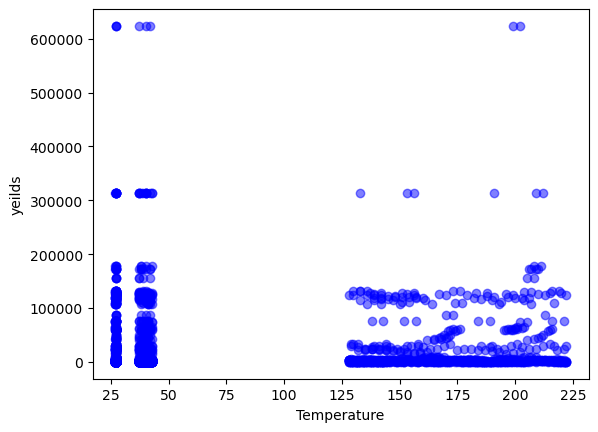

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["Temperature"], df["yeild"], color="blue", alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("yeild")

In [28]:
x=df[df["Crops"]=="Coconut"]
y=x[x["Year"]==2019]
y["yeild"].describe()

count         9.000000
mean      26450.444444
std       45663.402956
min           8.000000
25%         393.000000
50%        3290.000000
75%       23960.000000
max      130132.000000
Name: yeild, dtype: float64

In [33]:
df["Year"].unique()

array([2004, 2013, 2014, 2015, 2016, 2017, 2018, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2019], dtype=int64)

In [13]:
x=df[df["Crops"]=="Coconut"]
y=x[x["Year"]==2004]
y["yeild"].describe()

count       444.000000
mean      29214.686689
std       49971.311698
min           2.000000
25%         182.000000
50%        3472.000000
75%       31309.750000
max      313547.000000
Name: yeild, dtype: float64

array(['Coconut', nan, 'Cocoa', 'Coffee', 'Cardamum', 'Pepper',
       'Arecanut', 'Ginger', 'Tea', 'Paddy', 'Groundnut', 'Blackgram',
       'Cashew', 'Cotton'], dtype=object)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df_cop['Season'] = df_cop['Season'].replace({'Kharif': 'Zaid', 'Zaid': 'Rabi', 'Rabi': 'Kharif'})

# حالا اگر می‌خواهید که دمای خریف بیشترین، ربی بعد از آن و زاید کمترین باشد:
# فرض کنید که یک ستون 'Temperature' دارید که دما را ذخیره می‌کند.
df_cop['Season'] = pd.Categorical(df_cop['Season'], categories=['Kharif', 'Rabi', 'Zaid'], ordered=True)

# مرتب‌سازی داده‌ها بر اساس دما
df_cop_sorted = df_cop.sort_values(by='Temperature', ascending=False)
print(df_cop_sorted)
x=df_cop[df_cop["Temperature"]>0]
season_means = x.groupby(["Year", "Season"])["Temperature"].mean().unstack()

# آماده‌سازی داده‌ها برای رسم نمودار
years = season_means.index
x = np.arange(len(years))  # موقعیت‌های روی محور x
width = 0.3  # عرض میله‌ها
multiplier = 0

fig, ax = plt.subplots(figsize=(15,5),layout='constrained')

for season in ["Kharif", "Rabi", "Zaid"]:
    if season in season_means.columns:
        offset = width * multiplier
        rects = ax.bar(x + offset, season_means[season], width, label=season, linewidth=3, edgecolor='white')

        ax.bar_label(rects, padding=3, rotation=90, color="white", fontsize=15, labels=[f"{value:.2f}" for value in season_means[season]])

        multiplier += 1
# تنظیمات نمودار
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature by Season for Each Year')
ax.set_xticks(x + width, years)
ax.set_xticklabels(years, rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, season_means.max().max() + 5)
fig.patch.set_color("black")
ax.patch.set_color("black")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.legend(loc="best")
plt.grid()
plt.show()


NameError: name 'df_cop' is not defined

In [ ]:
df=pd.read_csv("E:/csv/baran.csv")
sh=pd.read_csv("karnataka.csv")
df.head()

,_id,Sl. No.,District,Annual Normal(mm),Annual Actual (mm),Annual Departure(%),Pre-Monsoon Normal (mm),Pre-Monsoon Actual (mm),Departure (%),SWM Normal(mm),SWM Actual (mm),SWM Departure(%),NEM Normal (mm),NEM Actual(mm),NEM Departure(%)
0,1,1.0,Bagalkote,582,341,-42,79.8,70.3,-12,362.0,242,-33,141,29,-79
1,2,2.0,Ballari,599,266,-56,74.4,55.7,-25,366.0,187,-49,159,24,-85
2,3,3.0,Belagavi,826,679,-18,94.8,86.9,-8,599.0,520,-13,133,72,-46
3,4,4.0,Bengaluru Rural,798,701,-12,141.3,164.0,16,444.0,406,-9,213,131,-38
4,5,5.0,Bengaluru Urban,846,689,-18,156.1,209.5,34,471.0,324,-31,219,156,-29


In [ ]:
# plt.scatter(df["Annual Actual (mm)"],sh["yeild"])
df["Annual Actual (mm)"].count()

32

In [88]:
df=pd.read_csv("temp.csv")

In [89]:
df.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13


In [108]:
df['JAN-FEB'] = pd.to_numeric(df['JAN-FEB'], errors='coerce')
df['MAR-MAY'] = pd.to_numeric(df['MAR-MAY'], errors='coerce')
df['JUN-SEP'] = pd.to_numeric(df['JUN-SEP'], errors='coerce')
df['OCT-DEC'] = pd.to_numeric(df['OCT-DEC'], errors='coerce')


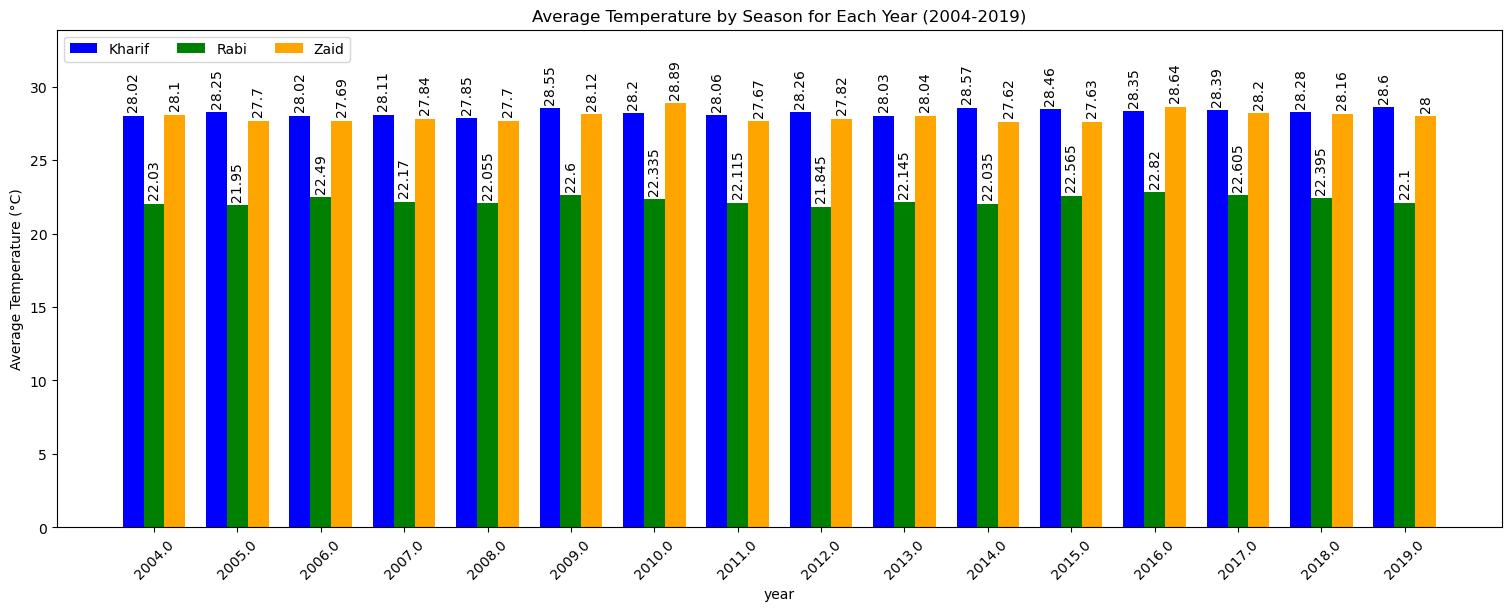

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# فرض بر این است که دیتافریم شما به نام df است
season_means = df[["YEAR", "JAN-FEB", "MAR-MAY", "JUN-SEP", "OCT-DEC"]].copy()

# فیلتر کردن داده‌ها برای سال‌های 2004 تا 2019
season_means = season_means[(season_means["YEAR"] >= 2004) & (season_means["YEAR"] <= 2019)]

# تعیین میانگین دما برای هر فصل
season_means["Kharif"] = season_means["JUN-SEP"]
season_means["Rabi"] = (season_means["JAN-FEB"] + season_means["OCT-DEC"]) / 2
season_means["Zaid"] = season_means["MAR-MAY"]

# آماده‌سازی داده‌ها برای رسم نمودار
years = season_means["YEAR"]
x_pos = np.arange(len(years))  # موقعیت‌های روی محور x
width = 0.25  # عرض میله‌ها
multiplier = 0

# رسم نمودار
fig, ax = plt.subplots(figsize=(15, 6), layout='constrained')

# رسم میله‌ها برای هر فصل
for season, color in zip(["Kharif", "Rabi", "Zaid"], ['blue', 'green', 'orange']):
    rects = ax.bar(x_pos + width * multiplier, season_means[season], width, label=season, color=color)
    ax.bar_label(rects, padding=3, rotation=90)  # افزودن برچسب‌های دما به میله‌ها
    multiplier += 1

# تنظیمات نمودار
ax.set_ylabel('Average Temperature (°C)')
ax.set_xlabel('year')
ax.set_title('Average Temperature by Season for Each Year (2004-2019)')
ax.set_xticks(x_pos + width, years)
ax.set_xticklabels(years, rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, season_means[["Kharif", "Rabi", "Zaid"]].max().max() + 5)

# نمایش نمودار
plt.show()


In [128]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeild', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [ ]:
)

TypeError: 'numpy.dtypes.ObjectDType' object is not callable

In [10]:
import matplotlib.ticker as mticker
import pandas as pd
df=pd.read_csv("E:/csv/baran.csv")
year = df.sort_values(by='Year')['Year'].unique()  


sum_yields = df.groupby(['Year', 'Crops'])['yeild'].sum().reset_index()


crop_yields = sum_yields.pivot(index='Year', columns='Crops', values='yeild').fillna(0)


fig, ax = plt.subplots()
ax.stackplot(year, crop_yields.values.T, labels=crop_yields.columns, alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('yields harvest')
ax.set_xlabel('Year')
ax.set_ylabel('mount of yields')



plt.show()

KeyError: 'Year'

NameError: name 'sns' is not defined

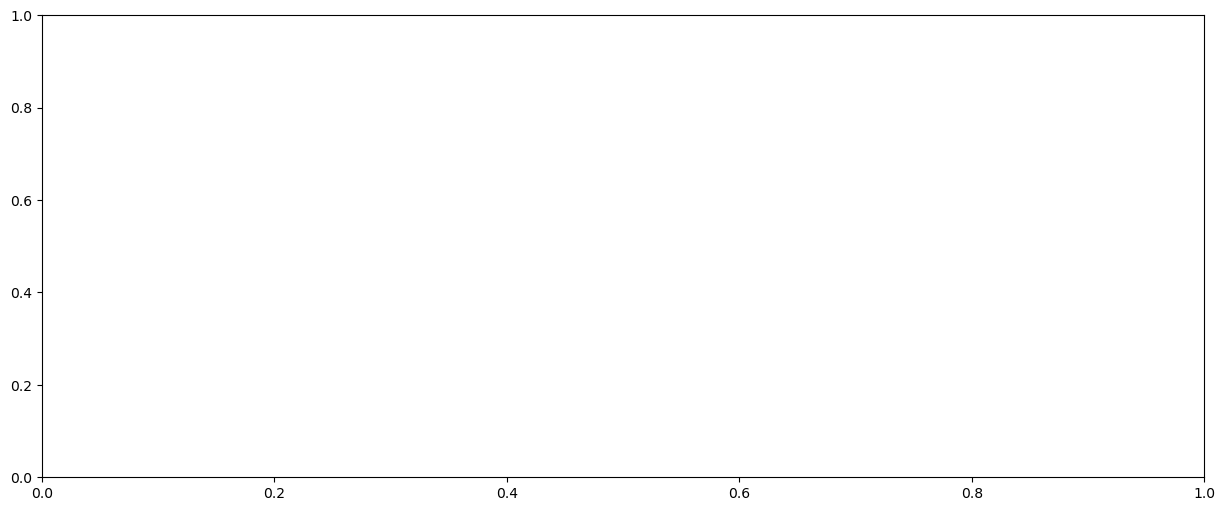

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
df_Chart = df.groupby(["Location", "Season"])["Rainfall"].mean().reset_index()
colors = ['#e001fa', '#010cfa', '#01a0fa']

ax=sns.barplot(x=df_Chart["Location"],y=df_Chart["Rainfall"],hue=df_Chart["Season"],palette=colors,width=0.5, edgecolor='white');

plt.title("Average rainfall chart for each region")
plt.xlabel("location",fontsize=21)
plt.ylabel("Average precipitation",fontsize=21)

ax.spines['top'].set_color('black')  
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('red') 
ax.spines['left'].set_color('red')
ax.patch.set_color("black")
fig.patch.set_color("black")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.legend(loc="best", labelcolor='white', facecolor='black', edgecolor='red', framealpha=0.7)
for x in ax.containers:
    plt.bar_label(x,color="red",rotation=90)
plt.show()

In [ ]:
fig ,ax =plt.subplots(2,2,figsize=(15,15))
fig.patch.set_color("black")
# Year Distribution
ax[0,0].set_title('Distribution of Year',fontsize=14,color="red")
sns.histplot(df['Year'], kde=True, color='yellow',ax=ax[0,0])
ax[0,0].patch.set_color("black")
for bar in ax[0,0].containers:
    ax[0,0].bar_label(bar, fmt="%.0f", color="white", fontsize=16)
ax[0,0].set_xticks(range(2004,2019,1))
# Area Distribution
ax[0,1].set_title('Distribution of Area',fontsize=14,color="red")
sns.histplot(df['Area'], kde=True, color='red',ax=ax[0,1])
ax[0,1].patch.set_color("black")
for bar in ax[0,1].containers:
    ax[0,1].bar_label(bar, fmt="%.0f", color="white", fontsize=16)
# Rainfall Distribution
ax[1,0].set_title('Distribution of Rainfall',fontsize=14,color="red")
sns.histplot(df['Rainfall'], kde=True, color='red',ax=ax[1,0])
ax[1,0].patch.set_color("black")
for bar in ax[1,0].containers:
    ax[1,0].bar_label(bar, fmt="%.0f", color="white", fontsize=16)
# Temperature Distribution
ax[1,1].set_title('Distribution of Temperature',fontsize=14,color="red")
sns.histplot(df['Temperature'], kde=True, color='red',ax=ax[1,1])
ax[1,1].patch.set_color("black")
for bar in ax[1,1].containers:
    ax[1,1].bar_label(bar, fmt="%.0f", color="white", fontsize=16)

ax[0,1].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='x', colors='white')

ax[0,1].tick_params(axis='y', colors='white')
ax[0,0].tick_params(axis='y', colors='white')
ax[1,1].tick_params(axis='y', colors='white')
ax[1,0].tick_params(axis='y', colors='white')


plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_csv("data_season.csv")


Year                 2016
Location         Gulbarga
Area                 5220
Rainfall           3360.0
Temperature          27.0
Soil type      Sandy loam
Irrigation          Spray
yeild             3699.0
Humidity             54.0
Crops             Coconut
price              234581
Season               Rabi
Name: 2017, dtype: object

In [43]:
df = df[df["yeild"] <= 300000]

In [47]:

df.loc[2015]

Year                 2014
Location         Gulbarga
Area                 6186
Rainfall           2746.2
Temperature          27.0
Soil type      Sandy loam
Irrigation          Spray
yeild             4167.0
Humidity             57.0
Crops             Coconut
price                 761
Season               Rabi
Name: 2015, dtype: object

In [ ]:
df[df[""]==165]

,level_0,index,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
163,163,165,2017,Gulbarga,66,3296.0,162.0,Black,Drip,5518.0,57.0,Cardamum,24848,Kharif


In [53]:
df.loc[165]

level_0             165
index               167
Year               2004
Location       Madikeri
Area                 42
Rainfall         3550.0
Temperature       164.0
Soil type         Black
Irrigation         Drip
yeild           3830.0
Humidity           57.0
Crops            Pepper
price             45608
Season           Kharif
Name: 165, dtype: object

In [62]:
df=pd.read_csv("data_season.csv")
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi


In [63]:
df=df[df["yeild"]<300000]

In [65]:
df.reset_index(inplace=True)

In [70]:
df[df["index"]==165]

,index,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeild,Humidity,Crops,price,Season
163,165,2017,Gulbarga,66,3296.0,162.0,Black,Drip,5518.0,57.0,Cardamum,24848,Kharif


In [80]:
import pandas as pd
import requests
import numpy as np
from math import radians, cos, sin, asin, sqrt
import time

# مختصات مکان‌ها
locations = {
    'Mangalore': (12.915605, 74.855965),
    'Kodagu': (12.4208, 75.7397),
    'Kasaragodu': (12.5000, 75.0000),
    'Raichur': (16.2000, 77.3667),
    'Gulbarga': (17.3358, 76.8376),
    'Madikeri': (12.427189, 75.747643),
    'Hassan': (13.00715, 76.0962),
    'Mysuru': (12.295810, 76.639381),
    'Chikmangaluru': (13.3223, 75.7370),
    'Bangalore': (12.972442, 77.580643),
    'Davangere': (14.470586, 75.914154)
}

# فصل‌ها
def get_date_range(year, season):
    if season == 'Kharif':
        return f"{year}-06-01", f"{year}-10-31"
    elif season == 'Rabi':
        return f"{year}-11-01", f"{year+1}-03-31"
    elif season == 'Zaid':
        return f"{year}-04-01", f"{year}-06-30"
    raise ValueError("Unknown season")

# فاصله جغرافیایی
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * asin(sqrt(a)) * 6371  # km

# دریافت دما از Open-Meteo
def get_temp_open_meteo(lat, lon, start, end):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start}&end_date={end}&daily=temperature_2m_mean&timezone=auto"
    try:
        res = requests.get(url, timeout=10).json()
        temps = res.get('daily', {}).get('temperature_2m_mean', [])
        if temps:
            return np.mean(temps)
    except Exception as e:
        print(f"Open-Meteo error: {e}")

# دریافت دما از NASA
def get_temp_nasa(lat, lon, start, end):
    start_fmt, end_fmt = start.replace("-", ""), end.replace("-", "")
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M&community=AG&longitude={lon}&latitude={lat}&start={start_fmt}&end={end_fmt}&format=JSON"
    try:
        res = requests.get(url, timeout=10).json()
        temps = res['properties']['parameter']['T2M']
        valid = [v for v in temps.values() if v != -999]
        if valid:
            return np.mean(valid)
    except Exception as e:
        print(f"NASA error: {e}")

# دریافت دما از Meteostat
def get_temp_meteostat(lat, lon, start, end):
    url = f"https://api.meteostat.net/v2/point/daily?lat={lat}&lon={lon}&start={start}&end={end}"
    headers = {"x-api-key": "f0cc61b02cmshb7169759b8ce1b9p1e76f0jsn87d8d6c3bf42"}
    try:
        res = requests.get(url, headers=headers, timeout=10).json()
        temps = [float(d['tavg']) for d in res.get('data', []) if d.get('tavg') is not None]
        if temps:
            return np.mean(temps)
    except Exception as e:
        print(f"Meteostat error: {e}")

# تابع نهایی برای گرفتن دما از چند منبع
def fetch_temperature(lat, lon, start, end):
    for source in [get_temp_open_meteo, get_temp_nasa, get_temp_meteostat]:
        temp = source(lat, lon, start, end)
        if temp is not None:
            return temp
    return None

# آماده‌سازی داده
df_api = df.copy()
unique = df_api[['Location', 'Year', 'Season']].drop_duplicates().reset_index(drop=True)
unique['lat'] = unique['Location'].map(lambda x: locations[x][0])
unique['lon'] = unique['Location'].map(lambda x: locations[x][1])
unique['start'], unique['end'] = zip(*unique.apply(lambda r: get_date_range(r['Year'], r['Season']), axis=1))

# استخراج دما
temps = []
for i, r in unique.iterrows():
    print(f"Fetching {r['Location']} {r['Year']} {r['Season']}")
    t = fetch_temperature(r['lat'], r['lon'], r['start'], r['end'])
    temps.append(t)
    if i % 60 == 0: time.sleep(60)

unique['correct_temperature'] = temps

# پر کردن مقادیر گمشده
for i, row in unique[unique['correct_temperature'].isna()].iterrows():
    candidates = unique[(unique['Year'] == row['Year']) & (unique['Season'] == row['Season']) & unique['correct_temperature'].notna()]
    if not candidates.empty:
        distances = candidates.apply(lambda r: haversine(row['lat'], row['lon'], r['lat'], r['lon']), axis=1)
        nearest = candidates.loc[distances.idxmin(), 'correct_temperature']
        unique.at[i, 'correct_temperature'] = nearest

# ادغام با دیتافریم اصلی
df_api = df_api.merge(unique[['Location', 'Year', 'Season', 'correct_temperature']], on=['Location', 'Year', 'Season'], how='left')
df_api['Temperature'] = df_api['correct_temperature']

df_api.drop('correct_temperature', axis=1, inplace=True)
df_api.to_csv("final_temperature_data.csv", index=False)
df_api.describe()

Fetching Mangalore 2004 Kharif
Fetching Kodagu 2004 Kharif
Fetching Kasaragodu 2004 Kharif
Fetching Raichur 2004 Kharif
Fetching Raichur 2004 Rabi
Fetching Gulbarga 2004 Rabi
Fetching Gulbarga 2004 Zaid
Fetching Gulbarga 2013 Zaid
Fetching Gulbarga 2014 Zaid
Fetching Gulbarga 2015 Zaid
Fetching Gulbarga 2016 Zaid
Fetching Gulbarga 2017 Zaid
Fetching Gulbarga 2018 Zaid
Fetching Gulbarga 2005 Zaid
Fetching Gulbarga 2006 Zaid
Fetching Gulbarga 2007 Zaid
Fetching Gulbarga 2008 Zaid
Fetching Gulbarga 2009 Zaid
Fetching Gulbarga 2010 Zaid
Fetching Gulbarga 2011 Zaid
Fetching Gulbarga 2012 Zaid
Fetching Gulbarga 2010 Kharif
Fetching Gulbarga 2011 Kharif
Fetching Gulbarga 2012 Kharif
Fetching Gulbarga 2013 Kharif
Fetching Gulbarga 2014 Kharif
Fetching Gulbarga 2015 Kharif
Fetching Gulbarga 2016 Kharif
Fetching Gulbarga 2017 Kharif
Fetching Gulbarga 2018 Kharif
Fetching Madikeri 2004 Kharif
Fetching Madikeri 2005 Kharif
Fetching Madikeri 2006 Kharif
Fetching Madikeri 2007 Kharif
Fetching Madike

,index,Year,Area,Rainfall,Temperature,yeild,Humidity,price
count,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000
mean,1578.319756,2009.925273,9348.738614,2813.505228,24.058606,18540.272322,55.582328,86387.616742
std,911.780938,5.104415,15186.646772,1163.272423,2.975371,38002.720444,2.471145,94173.607073
min,0.000000,2004.000000,1.000000,233.000000,19.060131,2.000000,50.000000,637.000000
25%,789.250000,2004.000000,153.000000,2903.100000,21.613245,393.000000,54.000000,2644.000000
50%,1578.500000,2010.000000,2188.000000,3296.000000,23.515232,2628.000000,56.000000,45186.000000
75%,2367.750000,2015.000000,10910.000000,3550.000000,26.257143,5518.000000,57.000000,203317.000000
max,3157.000000,2019.000000,52119.000000,3729.800000,32.468132,177939.000000,60.000000,249978.000000


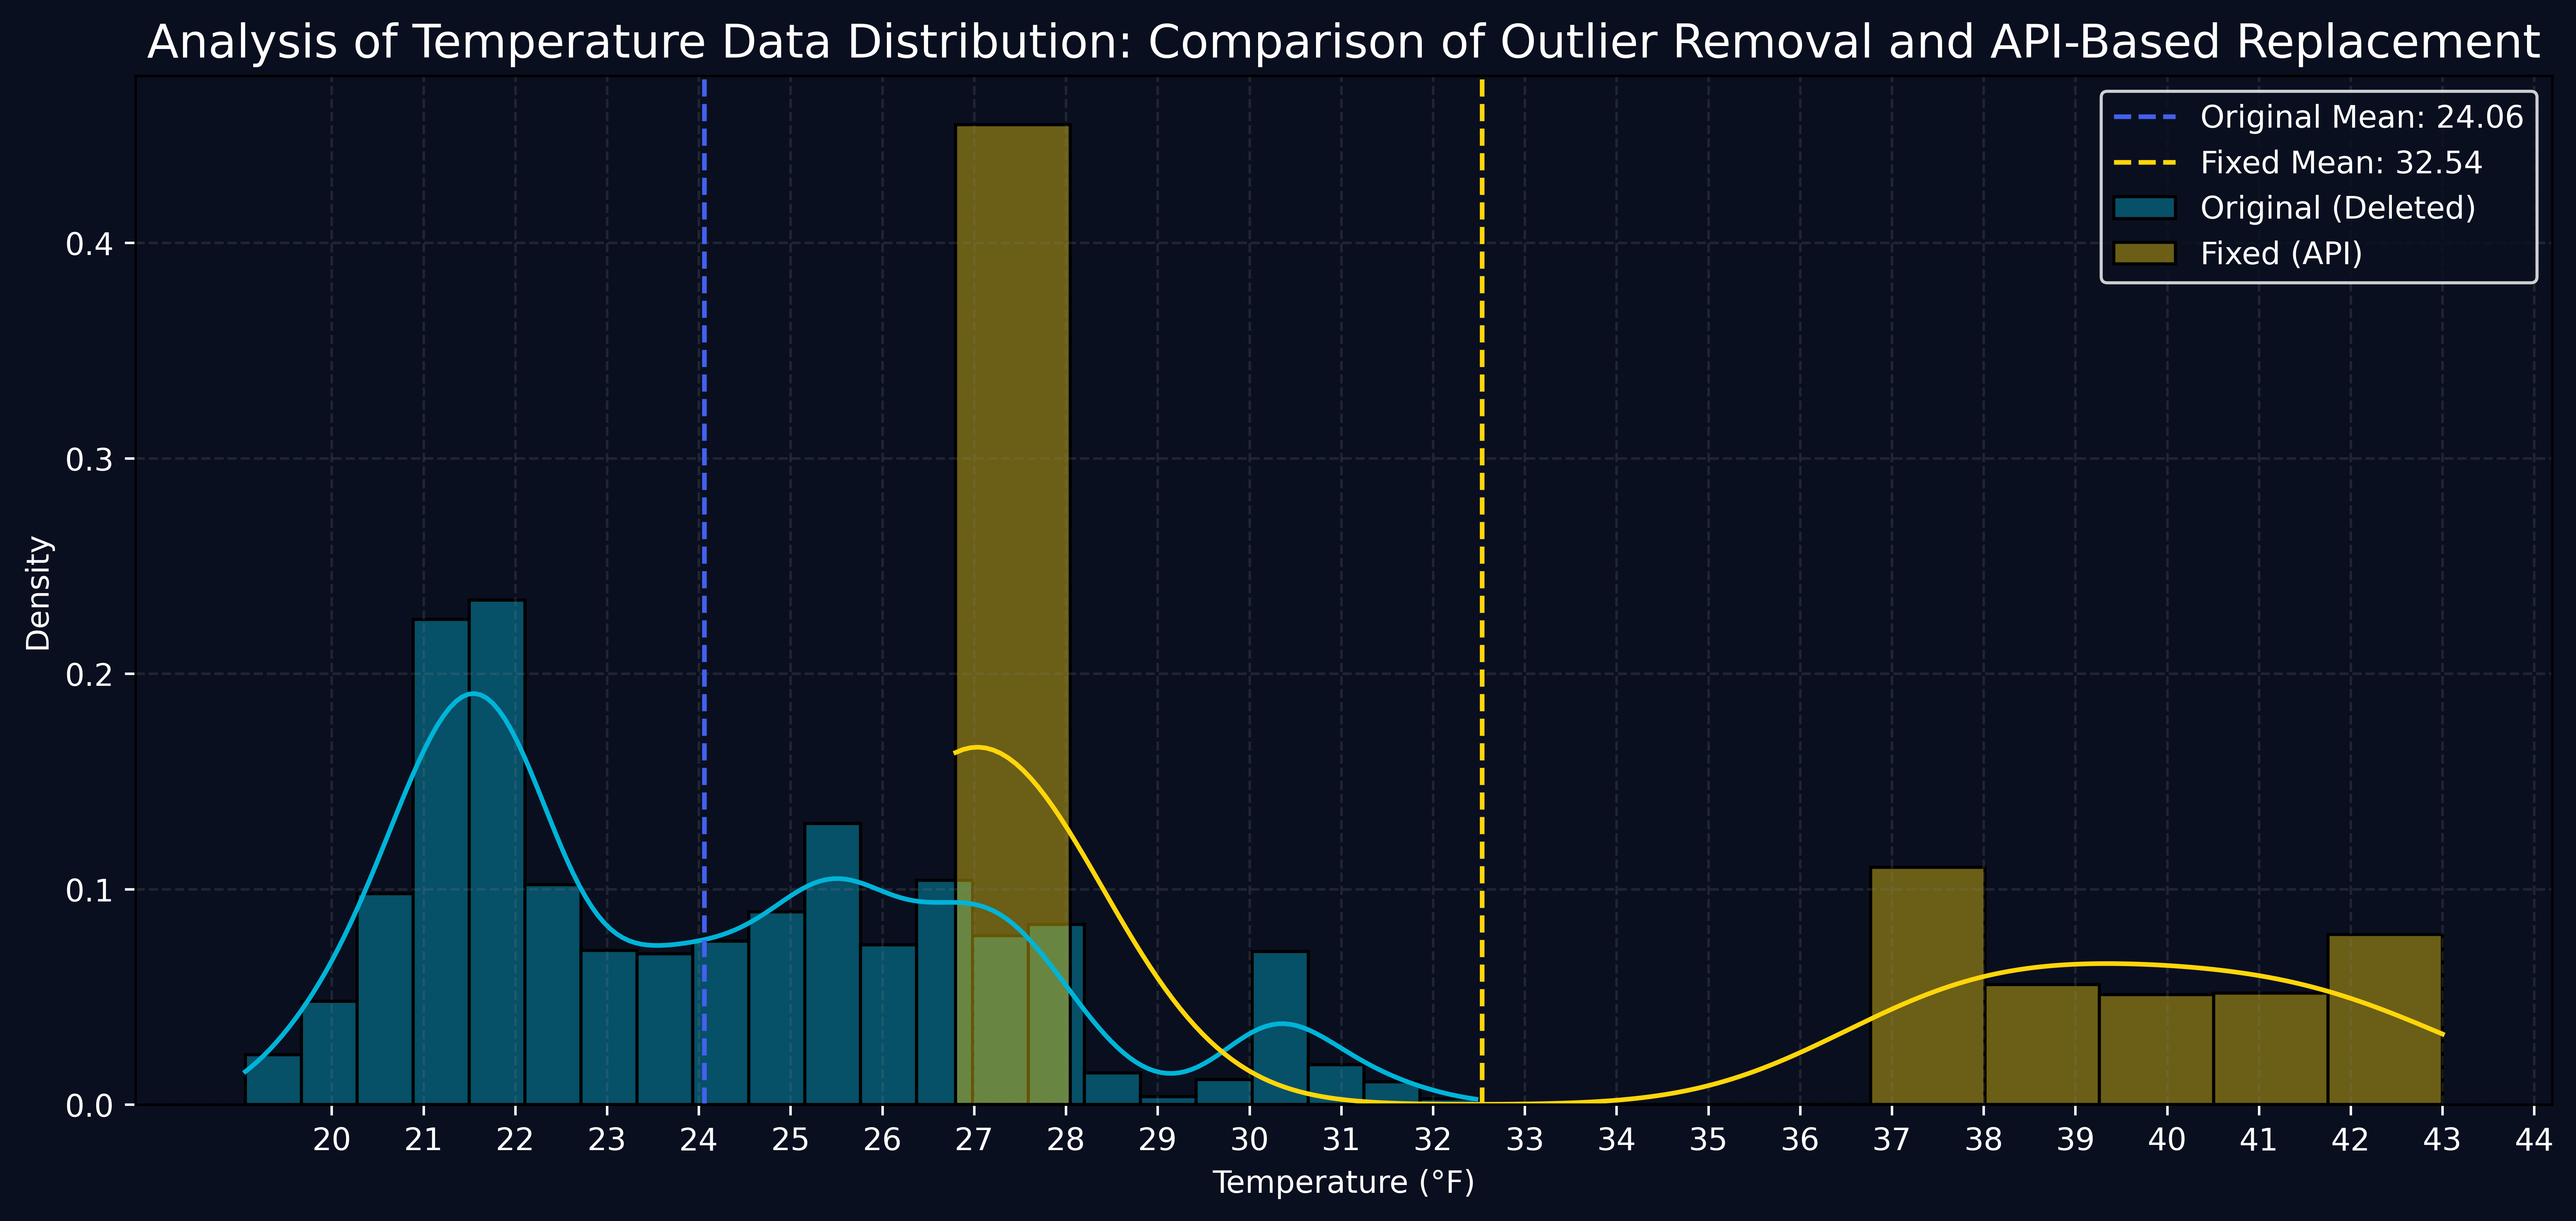

In [81]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#0A0F1F', dpi=600)
dfv=df[df["Temperature"]<125]
sns.histplot(
    df_api['Temperature'], 
    color='#00B4D8', label='Original (Deleted)', 
    kde=True, stat="density", alpha=0.4
)
sns.histplot(
    dfv['Temperature'], 
    color='#FFD60A', label='Fixed (API)', 
    kde=True, stat="density", alpha=0.4
)

plt.axvline(
    df_api['Temperature'].mean(), 
    color='#4361EE', linestyle='--', 
    label=f'Original Mean: {df_api["Temperature"].mean():.2f}'
)
plt.axvline(
    dfv['Temperature'].mean(), 
    color='#FFD60A', linestyle='--', 
    label=f'Fixed Mean: {dfv["Temperature"].mean():.2f}'
)

# plt.bar_label(ax.containers[0],color="red")
ax.patch.set_color("#0A0F1F")
plt.title("Analysis of Temperature Data Distribution: Comparison of Outlier Removal and API-Based Replacement", fontsize=15, color='white')
plt.xlabel('Temperature (°F)', color='white')
plt.ylabel('Density', color='white')
plt.legend(facecolor="#0A0F1F", edgecolor="white", labelcolor='white')
plt.grid(True, color='gray', linestyle='--', alpha=0.2)
ax.tick_params(colors='white')
plt.xticks(range(20,45,1))
plt.show()


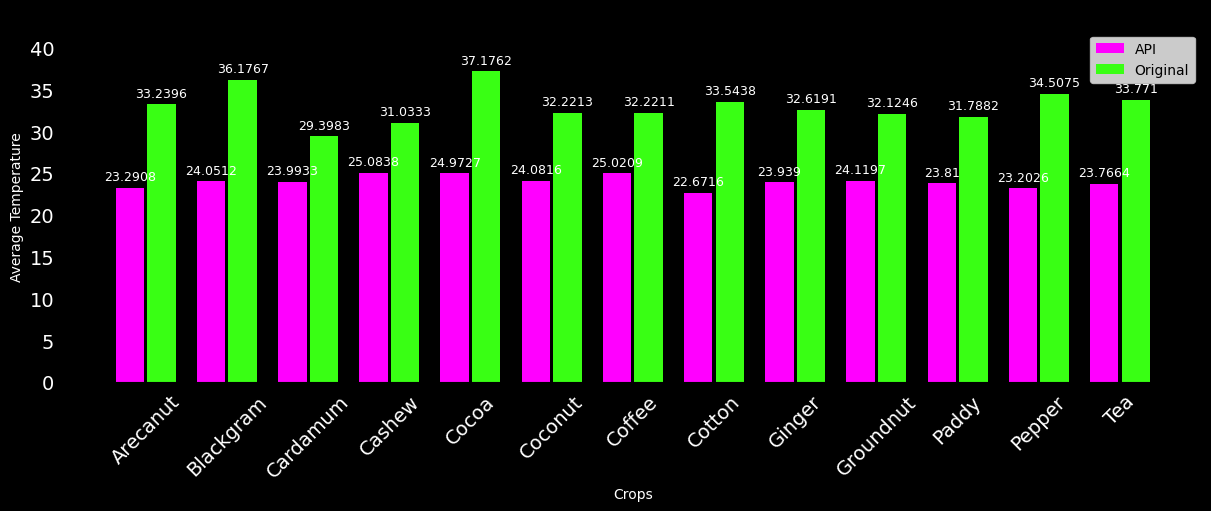

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Valid_Values=df[df["Temperature"]<125]

mean_temp1 = df_api.groupby("Crops")["Temperature"].mean()
mean_temp2 = Valid_Values.groupby("Crops")["Temperature"].mean()

crops = mean_temp1.index
x = np.arange(len(crops))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')


rects1 = ax.bar(x - width/1.8, mean_temp1, width, label='API', color='#FF00FF')
ax.bar_label(rects1, padding=3, fontsize=9,color="white")


rects2 = ax.bar(x + width/1.8, mean_temp2, width, label='Original', color='#39FF14')
ax.bar_label(rects2, padding=3, fontsize=9,color="white")



fig.patch.set_color("black")
ax.patch.set_color("black")
ax.tick_params(axis='y',labelcolor='white',labelsize=14)
ax.tick_params(axis='x',labelcolor='white',labelsize=14)
ax.set_ylabel('Average Temperature',color="white")
ax.set_xlabel('Crops',color="white")
ax.set_title('Comparison of Average Temperatures per Crop')
ax.set_xticks(x)
ax.set_xticklabels(crops, rotation=45)
ax.legend()
ax.set_ylim(0, max(mean_temp1.max(), mean_temp2.max()) + 5)

plt.show()


In [83]:
import plotly.graph_objects as go

fig = go.Figure()
Valid_Values=df[df["Temperature"]<125]

fig.add_trace(go.Scatter(
    x=df_api['Temperature'],
    y=df['yeild'],
    mode='markers',
    marker=dict(
        color='#00FFFF',
        size=8,         
        opacity=1     
    ),
    name='Original'
))


fig.add_trace(go.Scatter(
    x=Valid_Values['Temperature'],
    y=df['yeild'],
    mode='markers',
    marker=dict(
        color='#FF00FF',
        size=8,
        opacity=0.5
    ),
    name='API'
))


fig.update_layout(
    title='Temperature vs. Yield Comparison',
    xaxis_title='Temperature (°F)',
    yaxis_title='Yield',
    plot_bgcolor='#0A0F1F',
    paper_bgcolor='#0A0F1F',
    font=dict(color='white'),
    legend=dict(bgcolor='#0A0F1F')
)

fig.show()


In [84]:
df=pd.read_csv("data_season.csv")

In [86]:
df.loc[2510]

Year                2014
Location       Mangalore
Area                7028
Rainfall          3522.8
Temperature         38.0
Soil type       Laterite
Irrigation          Drip
yeild            3472.0
Humidity            59.0
Crops             Cashew
price                761
Season              Rabi
Name: 2510, dtype: object

In [87]:
x=df[df["Area"]>40000]
x["Area"].value_counts()

Area
51179    34
50975    34
51390    34
51709    34
51355    31
51353    31
52119    26
51040    19
48083    19
47200    19
46990    19
44563    19
44663    18
43013    18
Name: count, dtype: int64

In [89]:
df.loc[2510]

Year                2014
Location       Mangalore
Area                7028
Rainfall          3522.8
Temperature         38.0
Soil type       Laterite
Irrigation          Drip
yeild            3472.0
Humidity            59.0
Crops             Cashew
price                761
Season              Rabi
Name: 2510, dtype: object